In [1]:
import os
import fastai.vision as fv
import fastai.basics as fai
from pathlib import Path
from fastai.vision.all import *
#from fastai.vision import ImageList ---> esto ya no existe :(
import numpy as np

In [78]:
files=get_image_files("images")
path = Path("images")

De lo siguiente casi nada me sirvió :(

In [191]:
#data = ImageDataLoaders.from_folder(path, size=224, bs=8, train='train',test='test', valid='valid')

fnames = get_image_files("images")
#def get_labels(fnames):
#    return(list(['_'.join(x.name.split('_')[:-2]) for x in fnames]))
labels = [('_'.join(x.name.split('_')[:-2])) for x in fnames]
dls = ImageDataLoaders.from_lists(path, fnames, labels, valid_pct=0.3)
#labels[36]
#datos = ImageList.from_folder(images).split_subsets(train_size=0.7, valid_size=0.3, seed=42).label_from_func(get_labels).databunch(bs=64, num_workers=16, collate_fn='data_collate')
#dls = ImageDataLoaders.from_lists(path, fnames, labels)

In [135]:
#codes = np.loadtxt('image_class_labels.txt', dtype=int)
#dls = SegmentationDataLoaders.from_label_func("images", fnames, get_labels, valid_pct=0.3, seed=42, codes=codes, 
                                              #bs=64, val_bs=None, shuffle_train=True)

TypeError: 'PosixPath' object is not iterable

In [110]:
#Todo lo siguiente ya me valió de algo

In [144]:
labels[9]

'White_Pelican'

Hago mis carpetas de validación y prueba

In [238]:
try:
    os.mkdir("images/train")
except:
    print("Train already exists")
    
try:
    os.mkdir("images/valid")
except:
    print("Valid already exists")

Train already exists
Valid already exists


En este archivo me dijeron que se *sugería* partir mis datos de la siguiente forma (spoiler: no fue lo mejor)

In [221]:
doc = np.loadtxt("train_test_split.txt", int)
doc

array([[    1,     0],
       [    2,     1],
       [    3,     0],
       ...,
       [11786,     0],
       [11787,     1],
       [11788,     0]])

Muevo los documentos a una nueva carpeta: la de su nombre. Podía generarla con una expresión regular... pero me di cuneta que había cosas que no se cubrían chido y tuve que usar el nombre de la imagen

In [233]:
import shutil
for f in files:
    #print(files.index(f))
    #print(doc[0])
    if doc[files.index(f)][1] == 0:
        try:
            os.rename(f, "images/valid/"+str(f)[7:])
        except: 
            print(str(f)[7:]," Moved")
        #shutil.move(str(f)[7:], 'images/valid')
    else:
        try:
            os.rename(f, "images/train/"+str(f)[7:])
        except: 
            print(str(f)[7:]," Moved")
    #dest = Path("images")/f.name
    #os.rename(f,dest)

Worm_Eating_Warbler_0063_795553.jpg  Moved
Kentucky_Warbler_0047_165298.jpg  Moved
Tree_Sparrow_0043_124034.jpg  Moved
Chipping_Sparrow_0005_108931.jpg  Moved
Cliff_Swallow_0041_134111.jpg  Moved
Wilson_Warbler_0133_175626.jpg  Moved
Mockingbird_0030_79876.jpg  Moved
Wilson_Warbler_0075_175234.jpg  Moved
Shiny_Cowbird_0025_24444.jpg  Moved
White_Pelican_0025_97604.jpg  Moved
Blue_Winged_Warbler_0067_161860.jpg  Moved
Nighthawk_0048_83648.jpg  Moved
Pigeon_Guillemot_0023_39829.jpg  Moved
Clay_Colored_Sparrow_0002_110606.jpg  Moved
Northern_Waterthrush_0036_177274.jpg  Moved
Ring_Billed_Gull_0108_51108.jpg  Moved
Chestnut_Sided_Warbler_0034_163911.jpg  Moved
Olive_Sided_Flycatcher_0042_796886.jpg  Moved
Rusty_Blackbird_0055_6923.jpg  Moved
Florida_Jay_0017_65017.jpg  Moved
Palm_Warbler_0013_169411.jpg  Moved
Baltimore_Oriole_0073_87187.jpg  Moved
Bewick_Wren_0061_184898.jpg  Moved
Eastern_Towhee_0042_22155.jpg  Moved
Field_Sparrow_0130_113846.jpg  Moved
Red_Breasted_Merganser_0052_79178.

Pileated_Woodpecker_0039_180012.jpg  Moved
Hooded_Merganser_0014_796739.jpg  Moved
Yellow_Breasted_Chat_0071_22129.jpg  Moved
Lazuli_Bunting_0080_14893.jpg  Moved
Brandt_Cormorant_0014_23050.jpg  Moved
Ringed_Kingfisher_0101_72919.jpg  Moved
Scott_Oriole_0007_92439.jpg  Moved
Barn_Swallow_0073_131389.jpg  Moved
Hooded_Merganser_0007_79157.jpg  Moved
Pine_Warbler_0132_171936.jpg  Moved
Long_Tailed_Jaeger_0039_797089.jpg  Moved
Pomarine_Jaeger_0014_61335.jpg  Moved
Winter_Wren_0072_189521.jpg  Moved
Warbling_Vireo_0083_158284.jpg  Moved
Western_Grebe_0033_36395.jpg  Moved
Harris_Sparrow_0060_116576.jpg  Moved
Western_Grebe_0017_36218.jpg  Moved
Ring_Billed_Gull_0028_51454.jpg  Moved
Brandt_Cormorant_0039_22945.jpg  Moved
Herring_Gull_0145_46220.jpg  Moved
Pileated_Woodpecker_0032_180347.jpg  Moved
Pelagic_Cormorant_0033_23530.jpg  Moved
Mangrove_Cuckoo_0039_26348.jpg  Moved
Le_Conte_Sparrow_0083_795163.jpg  Moved
Tree_Swallow_0115_135832.jpg  Moved
Ringed_Kingfisher_0051_72997.jpg  Moved

Bay_Breasted_Warbler_0086_159860.jpg  Moved
Winter_Wren_0082_189549.jpg  Moved
Hooded_Warbler_0068_164872.jpg  Moved
Whip_Poor_Will_0007_796431.jpg  Moved
Blue_Jay_0092_61654.jpg  Moved
Summer_Tanager_0043_139884.jpg  Moved
Boat_Tailed_Grackle_0117_33576.jpg  Moved
Hooded_Warbler_0039_164928.jpg  Moved
Belted_Kingfisher_0017_70342.jpg  Moved
Marsh_Wren_0033_188778.jpg  Moved
Red_Legged_Kittiwake_0015_73792.jpg  Moved
Parakeet_Auklet_0012_795927.jpg  Moved
Hooded_Oriole_0082_90045.jpg  Moved
Chuck_Will_Widow_0042_796983.jpg  Moved
Horned_Lark_0056_74896.jpg  Moved
Yellow_Warbler_0016_176452.jpg  Moved
Sage_Thrasher_0077_155608.jpg  Moved
Gray_Catbird_0043_21008.jpg  Moved
Bay_Breasted_Warbler_0072_797114.jpg  Moved
Green_Kingfisher_0034_71075.jpg  Moved
Yellow_Throated_Vireo_0054_159635.jpg  Moved
Nashville_Warbler_0130_167101.jpg  Moved
Seaside_Sparrow_0063_120707.jpg  Moved
Brown_Pelican_0075_95357.jpg  Moved
Least_Flycatcher_0018_30462.jpg  Moved
Tree_Swallow_0019_137073.jpg  Moved
S

Northern_Fulmar_0056_43880.jpg  Moved
Mockingbird_0009_81130.jpg  Moved
Barn_Swallow_0017_132951.jpg  Moved
Rock_Wren_0004_189046.jpg  Moved
Yellow_Throated_Vireo_0016_794981.jpg  Moved
Dark_Eyed_Junco_0015_66576.jpg  Moved
American_Pipit_0081_99785.jpg  Moved
Red_Legged_Kittiwake_0010_73789.jpg  Moved
Cape_Glossy_Starling_0062_129254.jpg  Moved
Great_Grey_Shrike_0065_797027.jpg  Moved
Scissor_Tailed_Flycatcher_0020_41680.jpg  Moved
Heermann_Gull_0053_45854.jpg  Moved
Downy_Woodpecker_0044_184170.jpg  Moved
Loggerhead_Shrike_0125_105594.jpg  Moved
Boat_Tailed_Grackle_0083_33590.jpg  Moved
White_Pelican_0015_96952.jpg  Moved
Gray_Crowned_Rosy_Finch_0025_797274.jpg  Moved
Black_Throated_Blue_Warbler_0079_161194.jpg  Moved
Worm_Eating_Warbler_0012_795515.jpg  Moved
Heermann_Gull_0046_45888.jpg  Moved
Artic_Tern_0116_143613.jpg  Moved
Golden_Winged_Warbler_0078_794827.jpg  Moved
White_Breasted_Nuthatch_0003_86029.jpg  Moved
Palm_Warbler_0004_168786.jpg  Moved
Ruby_Throated_Hummingbird_0076

Least_Tern_0092_153361.jpg  Moved
Pomarine_Jaeger_0062_61351.jpg  Moved
Acadian_Flycatcher_0063_795585.jpg  Moved
Yellow_Bellied_Flycatcher_0007_795491.jpg  Moved
Pine_Grosbeak_0006_38421.jpg  Moved
Warbling_Vireo_0007_158717.jpg  Moved
Pacific_Loon_0038_75526.jpg  Moved
Yellow_Throated_Vireo_0013_159531.jpg  Moved
Spotted_Catbird_0034_19437.jpg  Moved
Pacific_Loon_0026_75593.jpg  Moved
Savannah_Sparrow_0095_119670.jpg  Moved
Black_And_White_Warbler_0034_160695.jpg  Moved
Harris_Sparrow_0050_116369.jpg  Moved
White_Pelican_0026_95832.jpg  Moved
Loggerhead_Shrike_0028_106221.jpg  Moved
Black_Billed_Cuckoo_0070_795310.jpg  Moved
Golden_Winged_Warbler_0077_164432.jpg  Moved
Cape_May_Warbler_0003_162920.jpg  Moved
American_Pipit_0091_100276.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0061_796907.jpg  Moved
Gadwall_0068_30886.jpg  Moved
Long_Tailed_Jaeger_0030_60961.jpg  Moved
Yellow_Billed_Cuckoo_0091_26428.jpg  Moved
White_Necked_Raven_0025_797346.jpg  Moved
Myrtle_Warbler_0034_166720.jpg  Mov

Laysan_Albatross_0051_1020.jpg  Moved
Great_Grey_Shrike_0082_106650.jpg  Moved
Western_Gull_0041_53554.jpg  Moved
Great_Crested_Flycatcher_0031_29825.jpg  Moved
House_Sparrow_0084_111300.jpg  Moved
Dark_Eyed_Junco_0061_66858.jpg  Moved
Horned_Puffin_0081_101054.jpg  Moved
Tennessee_Warbler_0080_167714.jpg  Moved
Least_Flycatcher_0026_30434.jpg  Moved
Ringed_Kingfisher_0021_72848.jpg  Moved
Yellow_Throated_Vireo_0079_159576.jpg  Moved
Clark_Nutcracker_0018_85166.jpg  Moved
Ivory_Gull_0037_49068.jpg  Moved
Red_Winged_Blackbird_0104_3918.jpg  Moved
Western_Gull_0006_53504.jpg  Moved
Bronzed_Cowbird_0085_24152.jpg  Moved
Western_Gull_0021_54649.jpg  Moved
Forsters_Tern_0114_152768.jpg  Moved
Mangrove_Cuckoo_0030_26350.jpg  Moved
Northern_Flicker_0111_28402.jpg  Moved
Common_Raven_0053_101291.jpg  Moved
Pileated_Woodpecker_0098_180170.jpg  Moved
Green_Kingfisher_0056_70972.jpg  Moved
American_Goldfinch_0135_32107.jpg  Moved
Gray_Kingbird_0032_70111.jpg  Moved
Green_Violetear_0047_795677.jpg

Shiny_Cowbird_0019_24323.jpg  Moved
Frigatebird_0096_43571.jpg  Moved
Cliff_Swallow_0100_133665.jpg  Moved
Scissor_Tailed_Flycatcher_0077_41688.jpg  Moved
Black_And_White_Warbler_0080_160375.jpg  Moved
Long_Tailed_Jaeger_0063_797073.jpg  Moved
Pomarine_Jaeger_0011_795777.jpg  Moved
Gray_Catbird_0071_20974.jpg  Moved
Heermann_Gull_0086_45304.jpg  Moved
Brown_Thrasher_0038_155246.jpg  Moved
Northern_Fulmar_0063_43631.jpg  Moved
Winter_Wren_0015_190099.jpg  Moved
Rhinoceros_Auklet_0027_797496.jpg  Moved
Black_Throated_Sparrow_0026_107198.jpg  Moved
Eastern_Towhee_0014_22367.jpg  Moved
Swainson_Warbler_0003_794866.jpg  Moved
Lincoln_Sparrow_0083_117272.jpg  Moved
Dark_Eyed_Junco_0058_68784.jpg  Moved
Western_Grebe_0061_36181.jpg  Moved
Blue_Grosbeak_0041_37174.jpg  Moved
Brown_Pelican_0085_95053.jpg  Moved
Western_Meadowlark_0069_78587.jpg  Moved
Great_Grey_Shrike_0070_106547.jpg  Moved
Cedar_Waxwing_0092_179123.jpg  Moved
Summer_Tanager_0025_139320.jpg  Moved
Canada_Warbler_0022_157106.jp

Swainson_Warbler_0013_794892.jpg  Moved
Red_Bellied_Woodpecker_0104_181616.jpg  Moved
Canada_Warbler_0114_162396.jpg  Moved
Black_And_White_Warbler_0125_160482.jpg  Moved
Bewick_Wren_0015_184981.jpg  Moved
Tropical_Kingbird_0052_69739.jpg  Moved
Blue_Grosbeak_0072_36774.jpg  Moved
Ovenbird_0032_93199.jpg  Moved
Yellow_Warbler_0017_176888.jpg  Moved
Kentucky_Warbler_0059_795905.jpg  Moved
Tennessee_Warbler_0013_163552.jpg  Moved
California_Gull_0110_41063.jpg  Moved
Philadelphia_Vireo_0055_156575.jpg  Moved
Red_Eyed_Vireo_0014_157062.jpg  Moved
Pileated_Woodpecker_0088_180054.jpg  Moved
Belted_Kingfisher_0012_70325.jpg  Moved
Tennessee_Warbler_0009_174937.jpg  Moved
Caspian_Tern_0115_145927.jpg  Moved
Brewer_Blackbird_0002_2278.jpg  Moved
Forsters_Tern_0059_151269.jpg  Moved
Loggerhead_Shrike_0018_26407.jpg  Moved
California_Gull_0089_40716.jpg  Moved
Bronzed_Cowbird_0081_24198.jpg  Moved
Pileated_Woodpecker_0118_180138.jpg  Moved
Painted_Bunting_0049_16869.jpg  Moved
Yellow_Billed_Cuck

Northern_Waterthrush_0068_177273.jpg  Moved
Common_Tern_0049_149159.jpg  Moved
Nighthawk_0055_83352.jpg  Moved
Yellow_Bellied_Flycatcher_0019_795512.jpg  Moved
Philadelphia_Vireo_0023_794797.jpg  Moved
Blue_Jay_0070_63684.jpg  Moved
Red_Bellied_Woodpecker_0073_180994.jpg  Moved
Cerulean_Warbler_0017_797198.jpg  Moved
Eastern_Towhee_0024_22382.jpg  Moved
Kentucky_Warbler_0023_165247.jpg  Moved
Le_Conte_Sparrow_0011_117038.jpg  Moved
Horned_Lark_0104_74142.jpg  Moved
Horned_Puffin_0069_101018.jpg  Moved
Seaside_Sparrow_0049_120735.jpg  Moved
House_Sparrow_0106_111564.jpg  Moved
Tree_Sparrow_0042_124512.jpg  Moved
Common_Tern_0057_149749.jpg  Moved
Sooty_Albatross_0003_1078.jpg  Moved
Laysan_Albatross_0075_668.jpg  Moved
Brown_Pelican_0102_93727.jpg  Moved
Gray_Catbird_0032_21551.jpg  Moved
Bronzed_Cowbird_0087_796223.jpg  Moved
Long_Tailed_Jaeger_0035_797100.jpg  Moved
Prothonotary_Warbler_0064_174106.jpg  Moved
Groove_Billed_Ani_0080_1549.jpg  Moved
American_Crow_0080_25220.jpg  Moved
A

Common_Raven_0002_102582.jpg  Moved
Indigo_Bunting_0044_14389.jpg  Moved
Rusty_Blackbird_0054_6676.jpg  Moved
Forsters_Tern_0045_151227.jpg  Moved
Black_Throated_Blue_Warbler_0060_161644.jpg  Moved
Black_Billed_Cuckoo_0071_26288.jpg  Moved
Nighthawk_0064_82196.jpg  Moved
Ovenbird_0130_92452.jpg  Moved
Pileated_Woodpecker_0026_180078.jpg  Moved
Cliff_Swallow_0033_133836.jpg  Moved
Seaside_Sparrow_0008_796538.jpg  Moved
Great_Crested_Flycatcher_0099_29305.jpg  Moved
Red_Bellied_Woodpecker_0095_180948.jpg  Moved
Great_Grey_Shrike_0063_797042.jpg  Moved
American_Redstart_0119_104057.jpg  Moved
Cape_May_Warbler_0022_162912.jpg  Moved
Gray_Catbird_0139_21281.jpg  Moved
Barn_Swallow_0023_130325.jpg  Moved
Clark_Nutcracker_0078_85416.jpg  Moved
Artic_Tern_0039_141390.jpg  Moved
Prairie_Warbler_0071_173140.jpg  Moved
Frigatebird_0035_43420.jpg  Moved
Cerulean_Warbler_0018_797183.jpg  Moved
Long_Tailed_Jaeger_0058_60900.jpg  Moved
Indigo_Bunting_0055_13473.jpg  Moved
Blue_Jay_0078_62351.jpg  Mov

Song_Sparrow_0101_120920.jpg  Moved
Common_Yellowthroat_0122_190570.jpg  Moved
Boat_Tailed_Grackle_0028_33777.jpg  Moved
Golden_Winged_Warbler_0046_794828.jpg  Moved
Bohemian_Waxwing_0040_177914.jpg  Moved
Blue_Winged_Warbler_0092_162044.jpg  Moved
Shiny_Cowbird_0062_24271.jpg  Moved
Long_Tailed_Jaeger_0048_797087.jpg  Moved
Parakeet_Auklet_0028_795944.jpg  Moved
Clark_Nutcracker_0076_85083.jpg  Moved
Cerulean_Warbler_0056_163339.jpg  Moved
Caspian_Tern_0113_146828.jpg  Moved
Summer_Tanager_0066_140621.jpg  Moved
Bewick_Wren_0127_184756.jpg  Moved
Lincoln_Sparrow_0072_117951.jpg  Moved
White_Eyed_Vireo_0085_159119.jpg  Moved
Red_Bellied_Woodpecker_0021_182303.jpg  Moved
Cactus_Wren_0092_185951.jpg  Moved
Red_Cockaded_Woodpecker_0052_794752.jpg  Moved
Lincoln_Sparrow_0050_117744.jpg  Moved
European_Goldfinch_0058_794665.jpg  Moved
Winter_Wren_0119_189545.jpg  Moved
White_Eyed_Vireo_0102_159420.jpg  Moved
Scissor_Tailed_Flycatcher_0031_41836.jpg  Moved
Scott_Oriole_0057_795856.jpg  Moved

Bohemian_Waxwing_0013_796660.jpg  Moved
White_Pelican_0079_97380.jpg  Moved
Winter_Wren_0142_190379.jpg  Moved
Swainson_Warbler_0007_174745.jpg  Moved
Common_Yellowthroat_0094_190690.jpg  Moved
Shiny_Cowbird_0034_796849.jpg  Moved
Least_Tern_0127_154141.jpg  Moved
Horned_Grebe_0063_34966.jpg  Moved
Philadelphia_Vireo_0078_794776.jpg  Moved
Bay_Breasted_Warbler_0089_797141.jpg  Moved
Nashville_Warbler_0102_167195.jpg  Moved
American_Pipit_0017_99902.jpg  Moved
House_Sparrow_0053_111388.jpg  Moved
Brewer_Sparrow_0024_107439.jpg  Moved
Gray_Kingbird_0077_70191.jpg  Moved
Red_Legged_Kittiwake_0027_795454.jpg  Moved
Black_Billed_Cuckoo_0081_26209.jpg  Moved
Black_Billed_Cuckoo_0087_795300.jpg  Moved
Indigo_Bunting_0050_11811.jpg  Moved
White_Breasted_Kingfisher_0002_73491.jpg  Moved
Marsh_Wren_0089_188318.jpg  Moved
Orchard_Oriole_0080_91417.jpg  Moved
Caspian_Tern_0117_146009.jpg  Moved
Marsh_Wren_0097_188214.jpg  Moved
Spotted_Catbird_0037_796810.jpg  Moved
Yellow_Bellied_Flycatcher_0018_

Rufous_Hummingbird_0006_59621.jpg  Moved
Prairie_Warbler_0025_165306.jpg  Moved
Chuck_Will_Widow_0001_796975.jpg  Moved
White_Breasted_Nuthatch_0086_86553.jpg  Moved
Ovenbird_0126_92602.jpg  Moved
Brandt_Cormorant_0071_23007.jpg  Moved
Common_Yellowthroat_0059_190584.jpg  Moved
Blue_Jay_0011_63660.jpg  Moved
Brewer_Blackbird_0082_2593.jpg  Moved
Brandt_Cormorant_0003_22922.jpg  Moved
Chestnut_Sided_Warbler_0090_163629.jpg  Moved
Canada_Warbler_0094_26880.jpg  Moved
Brewer_Sparrow_0034_796693.jpg  Moved
Red_Faced_Cormorant_0052_796316.jpg  Moved
Great_Crested_Flycatcher_0136_29490.jpg  Moved
Barn_Swallow_0043_130779.jpg  Moved
Grasshopper_Sparrow_0119_116081.jpg  Moved
American_Three_Toed_Woodpecker_0004_179908.jpg  Moved
Great_Crested_Flycatcher_0044_29995.jpg  Moved
Pomarine_Jaeger_0054_795791.jpg  Moved
Chipping_Sparrow_0089_107535.jpg  Moved
Slaty_Backed_Gull_0050_796045.jpg  Moved
Red_Bellied_Woodpecker_0115_180775.jpg  Moved
Evening_Grosbeak_0112_37922.jpg  Moved
Green_Kingfisher_

White_Breasted_Kingfisher_0115_73252.jpg  Moved
Chestnut_Sided_Warbler_0016_164060.jpg  Moved
Glaucous_Winged_Gull_0053_44881.jpg  Moved
Western_Wood_Pewee_0028_795057.jpg  Moved
Le_Conte_Sparrow_0021_117105.jpg  Moved
Hooded_Oriole_0060_90879.jpg  Moved
Seaside_Sparrow_0056_120710.jpg  Moved
Pileated_Woodpecker_0004_180307.jpg  Moved
Slaty_Backed_Gull_0078_796042.jpg  Moved
Barn_Swallow_0047_130016.jpg  Moved
Brown_Thrasher_0120_155133.jpg  Moved
Painted_Bunting_0039_15235.jpg  Moved
Henslow_Sparrow_0028_796570.jpg  Moved
Downy_Woodpecker_0025_184545.jpg  Moved
Magnolia_Warbler_0001_166266.jpg  Moved
Worm_Eating_Warbler_0094_795522.jpg  Moved
Northern_Fulmar_0098_43578.jpg  Moved
Anna_Hummingbird_0019_57025.jpg  Moved
Pileated_Woodpecker_0050_180398.jpg  Moved
Bronzed_Cowbird_0043_796224.jpg  Moved
Nashville_Warbler_0104_167096.jpg  Moved
Ovenbird_0108_92675.jpg  Moved
Gadwall_0012_30920.jpg  Moved
Field_Sparrow_0074_113504.jpg  Moved
Red_Faced_Cormorant_0070_796319.jpg  Moved
Brewer_

Boat_Tailed_Grackle_0035_33750.jpg  Moved
Shiny_Cowbird_0075_24335.jpg  Moved
Whip_Poor_Will_0016_796424.jpg  Moved
Pine_Warbler_0002_171176.jpg  Moved
Louisiana_Waterthrush_0003_177479.jpg  Moved
Belted_Kingfisher_0027_70397.jpg  Moved
Ovenbird_0124_93103.jpg  Moved
Common_Yellowthroat_0021_190655.jpg  Moved
Black_Billed_Cuckoo_0042_795308.jpg  Moved
Gray_Kingbird_0023_795035.jpg  Moved
Northern_Fulmar_0033_43794.jpg  Moved
Heermann_Gull_0128_45663.jpg  Moved
Clark_Nutcracker_0067_85302.jpg  Moved
House_Sparrow_0028_113217.jpg  Moved
Bobolink_0131_9578.jpg  Moved
Gadwall_0085_31171.jpg  Moved
Carolina_Wren_0091_186464.jpg  Moved
Red_Winged_Blackbird_0072_4338.jpg  Moved
Sage_Thrasher_0024_796463.jpg  Moved
European_Goldfinch_0046_33307.jpg  Moved
Scarlet_Tanager_0033_137603.jpg  Moved
Orange_Crowned_Warbler_0064_166929.jpg  Moved
Least_Tern_0006_153921.jpg  Moved
Evening_Grosbeak_0133_37976.jpg  Moved
Sooty_Albatross_0071_1116.jpg  Moved
Pied_Kingfisher_0080_72199.jpg  Moved
Red_Legge

Red_Winged_Blackbird_0005_5636.jpg  Moved
Gray_Kingbird_0036_70184.jpg  Moved
Prairie_Warbler_0115_172689.jpg  Moved
Yellow_Breasted_Chat_0041_21683.jpg  Moved
Golden_Winged_Warbler_0018_164558.jpg  Moved
Brandt_Cormorant_0061_22902.jpg  Moved
Rose_Breasted_Grosbeak_0008_39481.jpg  Moved
Slaty_Backed_Gull_0046_796035.jpg  Moved
Rose_Breasted_Grosbeak_0029_39434.jpg  Moved
Great_Grey_Shrike_0091_797054.jpg  Moved
Red_Legged_Kittiwake_0068_795430.jpg  Moved
Fish_Crow_0072_25945.jpg  Moved
Painted_Bunting_0073_16737.jpg  Moved
Blue_Jay_0017_62854.jpg  Moved
Great_Grey_Shrike_0066_106759.jpg  Moved
Red_Faced_Cormorant_0066_796333.jpg  Moved
Tennessee_Warbler_0065_174757.jpg  Moved
Lincoln_Sparrow_0116_117372.jpg  Moved
Yellow_Warbler_0040_176954.jpg  Moved
House_Wren_0086_187815.jpg  Moved
Brewer_Blackbird_0103_2273.jpg  Moved
Gray_Kingbird_0059_795030.jpg  Moved
Song_Sparrow_0042_121314.jpg  Moved
Fox_Sparrow_0040_115034.jpg  Moved
Tree_Swallow_0075_136081.jpg  Moved
Gray_Kingbird_0053_70

Cardinal_0001_17057.jpg  Moved
Great_Grey_Shrike_0020_797052.jpg  Moved
Horned_Grebe_0082_34725.jpg  Moved
Rusty_Blackbird_0006_6633.jpg  Moved
Grasshopper_Sparrow_0018_116056.jpg  Moved
Mangrove_Cuckoo_0048_26351.jpg  Moved
Belted_Kingfisher_0048_70532.jpg  Moved
Scissor_Tailed_Flycatcher_0117_42026.jpg  Moved
Pigeon_Guillemot_0042_40281.jpg  Moved
Pileated_Woodpecker_0087_179959.jpg  Moved
Yellow_Throated_Vireo_0020_159634.jpg  Moved
Prothonotary_Warbler_0076_174118.jpg  Moved
Chipping_Sparrow_0062_110187.jpg  Moved
Yellow_Breasted_Chat_0012_21961.jpg  Moved
American_Pipit_0082_99867.jpg  Moved
Hooded_Oriole_0035_90331.jpg  Moved
Western_Gull_0036_54329.jpg  Moved
Least_Flycatcher_0049_30361.jpg  Moved
Green_Kingfisher_0011_71183.jpg  Moved
Prairie_Warbler_0002_172622.jpg  Moved
Gray_Crowned_Rosy_Finch_0018_26978.jpg  Moved
Black_Billed_Cuckoo_0017_26221.jpg  Moved
Sage_Thrasher_0026_155646.jpg  Moved
Yellow_Warbler_0114_176201.jpg  Moved
Blue_Grosbeak_0109_36914.jpg  Moved
Laysan_Al

Anna_Hummingbird_0091_56004.jpg  Moved
Chuck_Will_Widow_0059_796982.jpg  Moved
Warbling_Vireo_0001_158397.jpg  Moved
Northern_Flicker_0138_28476.jpg  Moved
Lincoln_Sparrow_0013_117202.jpg  Moved
Laysan_Albatross_0088_883.jpg  Moved
Loggerhead_Shrike_0114_104960.jpg  Moved
California_Gull_0088_41296.jpg  Moved
Nighthawk_0073_83540.jpg  Moved
Tree_Sparrow_0035_123211.jpg  Moved
Blue_Winged_Warbler_0043_161804.jpg  Moved
Nighthawk_0019_83850.jpg  Moved
Yellow_Headed_Blackbird_0040_7514.jpg  Moved
Caspian_Tern_0018_146010.jpg  Moved
Green_Kingfisher_0058_70998.jpg  Moved
Field_Sparrow_0092_113580.jpg  Moved
Downy_Woodpecker_0072_184401.jpg  Moved
Ovenbird_0099_93148.jpg  Moved
Indigo_Bunting_0024_13523.jpg  Moved
Myrtle_Warbler_0001_166770.jpg  Moved
Grasshopper_Sparrow_0017_115908.jpg  Moved
Least_Flycatcher_0023_30352.jpg  Moved
Seaside_Sparrow_0011_120820.jpg  Moved
White_Throated_Sparrow_0038_128853.jpg  Moved
Fish_Crow_0037_26071.jpg  Moved
Western_Meadowlark_0022_78410.jpg  Moved
Wes

Western_Meadowlark_0097_78239.jpg  Moved
Prairie_Warbler_0073_172771.jpg  Moved
Brewer_Sparrow_0027_796713.jpg  Moved
Ivory_Gull_0052_50013.jpg  Moved
Heermann_Gull_0004_45936.jpg  Moved
Anna_Hummingbird_0044_56066.jpg  Moved
Ivory_Gull_0005_49021.jpg  Moved
Hooded_Warbler_0028_164883.jpg  Moved
Northern_Flicker_0118_28500.jpg  Moved
Pine_Warbler_0095_171588.jpg  Moved
Red_Headed_Woodpecker_0108_183403.jpg  Moved
Chuck_Will_Widow_0058_796999.jpg  Moved
Magnolia_Warbler_0018_165958.jpg  Moved
Black_Billed_Cuckoo_0037_795330.jpg  Moved
Cardinal_0012_18638.jpg  Moved
House_Sparrow_0098_111073.jpg  Moved
Mockingbird_0096_79878.jpg  Moved
Eastern_Towhee_0074_22620.jpg  Moved
Ringed_Kingfisher_0053_72875.jpg  Moved
Belted_Kingfisher_0080_70725.jpg  Moved
Indigo_Bunting_0040_11805.jpg  Moved
Gray_Kingbird_0019_795013.jpg  Moved
Red_Eyed_Vireo_0045_157252.jpg  Moved
Yellow_Headed_Blackbird_0073_8442.jpg  Moved
Laysan_Albatross_0103_504.jpg  Moved
Western_Gull_0122_40866.jpg  Moved
Tree_Sparrow

Bay_Breasted_Warbler_0028_797119.jpg  Moved
Yellow_Billed_Cuckoo_0098_26501.jpg  Moved
Common_Tern_0084_147980.jpg  Moved
Hooded_Oriole_0008_90118.jpg  Moved
Chestnut_Sided_Warbler_0110_164023.jpg  Moved
Black_Billed_Cuckoo_0054_26313.jpg  Moved
Blue_Headed_Vireo_0123_156443.jpg  Moved
Black_Tern_0065_144076.jpg  Moved
Clark_Nutcracker_0043_84853.jpg  Moved
Marsh_Wren_0134_188213.jpg  Moved
Field_Sparrow_0125_113869.jpg  Moved
Caspian_Tern_0027_145899.jpg  Moved
Eastern_Towhee_0064_22649.jpg  Moved
Magnolia_Warbler_0092_165807.jpg  Moved
Gray_Crowned_Rosy_Finch_0066_797298.jpg  Moved
Horned_Lark_0082_73833.jpg  Moved
Pelagic_Cormorant_0017_23875.jpg  Moved
Eared_Grebe_0010_34151.jpg  Moved
Shiny_Cowbird_0081_796833.jpg  Moved
Magnolia_Warbler_0066_166184.jpg  Moved
Worm_Eating_Warbler_0065_795551.jpg  Moved
Caspian_Tern_0116_145607.jpg  Moved
Common_Tern_0043_147753.jpg  Moved
Sooty_Albatross_0077_1080.jpg  Moved
Scissor_Tailed_Flycatcher_0016_42111.jpg  Moved
Green_Jay_0038_65702.jpg 

Black_Capped_Vireo_0008_797454.jpg  Moved
Heermann_Gull_0110_45968.jpg  Moved
Northern_Flicker_0069_28924.jpg  Moved
Eastern_Towhee_0120_22189.jpg  Moved
Worm_Eating_Warbler_0045_795518.jpg  Moved
Slaty_Backed_Gull_0053_796051.jpg  Moved
Chipping_Sparrow_0030_109741.jpg  Moved
Golden_Winged_Warbler_0014_164464.jpg  Moved
Winter_Wren_0103_189509.jpg  Moved
Indigo_Bunting_0056_12637.jpg  Moved
Belted_Kingfisher_0041_70595.jpg  Moved
Kentucky_Warbler_0027_795917.jpg  Moved
American_Three_Toed_Woodpecker_0007_179932.jpg  Moved
Wilson_Warbler_0109_175578.jpg  Moved
White_Throated_Sparrow_0004_128944.jpg  Moved
Anna_Hummingbird_0065_56154.jpg  Moved
Artic_Tern_0090_143583.jpg  Moved
Prothonotary_Warbler_0045_173536.jpg  Moved
White_Breasted_Kingfisher_0103_73316.jpg  Moved
Common_Tern_0075_148528.jpg  Moved
White_Breasted_Kingfisher_0011_73267.jpg  Moved
White_Crowned_Sparrow_0043_127096.jpg  Moved
Geococcyx_0101_104230.jpg  Moved
Carolina_Wren_0024_186377.jpg  Moved
Nashville_Warbler_0115_1

Western_Meadowlark_0125_77850.jpg  Moved
Yellow_Billed_Cuckoo_0003_26797.jpg  Moved
Common_Raven_0029_102039.jpg  Moved
Brown_Creeper_0002_24838.jpg  Moved
Nashville_Warbler_0041_167534.jpg  Moved
Western_Wood_Pewee_0061_795060.jpg  Moved
Evening_Grosbeak_0001_37437.jpg  Moved
Gadwall_0025_30933.jpg  Moved
Bronzed_Cowbird_0021_24189.jpg  Moved
Heermann_Gull_0035_45754.jpg  Moved
Least_Auklet_0035_1888.jpg  Moved
Yellow_Warbler_0035_176360.jpg  Moved
White_Breasted_Nuthatch_0104_85969.jpg  Moved
Great_Crested_Flycatcher_0050_29786.jpg  Moved
Red_Breasted_Merganser_0014_79205.jpg  Moved
Pine_Grosbeak_0021_38382.jpg  Moved
Sage_Thrasher_0066_155666.jpg  Moved
American_Crow_0093_25694.jpg  Moved
Western_Wood_Pewee_0019_795046.jpg  Moved
Black_And_White_Warbler_0086_160836.jpg  Moved
Eastern_Towhee_0134_22624.jpg  Moved
Long_Tailed_Jaeger_0056_797092.jpg  Moved
Acadian_Flycatcher_0056_29086.jpg  Moved
Caspian_Tern_0059_145582.jpg  Moved
Hooded_Merganser_0023_796784.jpg  Moved
Bohemian_Waxwi

Brown_Pelican_0017_94383.jpg  Moved
Heermann_Gull_0044_45705.jpg  Moved
American_Redstart_0026_103729.jpg  Moved
Brandt_Cormorant_0015_23198.jpg  Moved
Great_Crested_Flycatcher_0042_29438.jpg  Moved
Orchard_Oriole_0018_91601.jpg  Moved
Olive_Sided_Flycatcher_0043_30632.jpg  Moved
Harris_Sparrow_0041_116611.jpg  Moved
Pied_Billed_Grebe_0099_35872.jpg  Moved
Western_Wood_Pewee_0011_98205.jpg  Moved
Orchard_Oriole_0107_91472.jpg  Moved
Black_Tern_0033_144328.jpg  Moved
Harris_Sparrow_0070_116400.jpg  Moved
Rhinoceros_Auklet_0014_797522.jpg  Moved
Summer_Tanager_0107_139488.jpg  Moved
Sayornis_0056_99553.jpg  Moved
Scott_Oriole_0010_795852.jpg  Moved
Henslow_Sparrow_0013_796578.jpg  Moved
American_Three_Toed_Woodpecker_0005_179902.jpg  Moved
American_Goldfinch_0123_32505.jpg  Moved
Song_Sparrow_0046_121903.jpg  Moved
Crested_Auklet_0018_1817.jpg  Moved
Pacific_Loon_0041_75782.jpg  Moved
Red_Eyed_Vireo_0052_157185.jpg  Moved
Palm_Warbler_0100_168725.jpg  Moved
Bay_Breasted_Warbler_0082_7971

Carolina_Wren_0014_186525.jpg  Moved
Pomarine_Jaeger_0080_795751.jpg  Moved
Black_Billed_Cuckoo_0053_795321.jpg  Moved
Common_Yellowthroat_0098_190430.jpg  Moved
Pine_Grosbeak_0096_38441.jpg  Moved
Rufous_Hummingbird_0035_59434.jpg  Moved
Long_Tailed_Jaeger_0045_61007.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0002_796908.jpg  Moved
European_Goldfinch_0062_794657.jpg  Moved
Black_Capped_Vireo_0017_797492.jpg  Moved
Tree_Sparrow_0005_122949.jpg  Moved
Scissor_Tailed_Flycatcher_0072_42085.jpg  Moved
Black_Throated_Sparrow_0020_106971.jpg  Moved
Golden_Winged_Warbler_0084_164541.jpg  Moved
Geococcyx_0011_104779.jpg  Moved
Least_Tern_0062_153259.jpg  Moved
Lazuli_Bunting_0032_14778.jpg  Moved
Nighthawk_0065_82895.jpg  Moved
American_Crow_0139_25186.jpg  Moved
Rose_Breasted_Grosbeak_0003_39223.jpg  Moved
Clark_Nutcracker_0003_85296.jpg  Moved
Cliff_Swallow_0055_133624.jpg  Moved
Evening_Grosbeak_0078_38051.jpg  Moved
Summer_Tanager_0073_139379.jpg  Moved
Green_Tailed_Towhee_0035_154888.jpg  Mov

Sage_Thrasher_0071_155642.jpg  Moved
Fish_Crow_0055_26077.jpg  Moved
Song_Sparrow_0060_122371.jpg  Moved
Prairie_Warbler_0094_91950.jpg  Moved
Yellow_Warbler_0030_176236.jpg  Moved
White_Breasted_Kingfisher_0101_73261.jpg  Moved
Anna_Hummingbird_0099_55916.jpg  Moved
Pacific_Loon_0040_75414.jpg  Moved
Savannah_Sparrow_0136_119581.jpg  Moved
Brewer_Blackbird_0066_2693.jpg  Moved
American_Pipit_0022_100227.jpg  Moved
Harris_Sparrow_0018_116402.jpg  Moved
Brewer_Sparrow_0049_796705.jpg  Moved
Slaty_Backed_Gull_0076_796005.jpg  Moved
Forsters_Tern_0035_151757.jpg  Moved
Horned_Grebe_0100_34462.jpg  Moved
Yellow_Breasted_Chat_0090_21931.jpg  Moved
Northern_Fulmar_0097_43865.jpg  Moved
Gray_Catbird_0069_21065.jpg  Moved
Prairie_Warbler_0112_173383.jpg  Moved
Black_Billed_Cuckoo_0027_26319.jpg  Moved
Barn_Swallow_0013_131812.jpg  Moved
Fox_Sparrow_0119_115512.jpg  Moved
Seaside_Sparrow_0038_120819.jpg  Moved
Magnolia_Warbler_0077_165674.jpg  Moved
Tree_Swallow_0066_135788.jpg  Moved
Horned_Gr

Chipping_Sparrow_0041_108370.jpg  Moved
Golden_Winged_Warbler_0069_164456.jpg  Moved
American_Three_Toed_Woodpecker_0019_179870.jpg  Moved
Pelagic_Cormorant_0042_23522.jpg  Moved
Parakeet_Auklet_0065_795969.jpg  Moved
Mourning_Warbler_0056_166476.jpg  Moved
Eared_Grebe_0006_34347.jpg  Moved
Herring_Gull_0054_46164.jpg  Moved
Purple_Finch_0013_27506.jpg  Moved
Rhinoceros_Auklet_0022_2170.jpg  Moved
Geococcyx_0015_104792.jpg  Moved
Gray_Crowned_Rosy_Finch_0019_27192.jpg  Moved
Horned_Puffin_0066_100877.jpg  Moved
Glaucous_Winged_Gull_0116_45236.jpg  Moved
House_Sparrow_0080_111099.jpg  Moved
Bank_Swallow_0019_129788.jpg  Moved
Pelagic_Cormorant_0032_23570.jpg  Moved
Forsters_Tern_0089_152372.jpg  Moved
Cactus_Wren_0069_186033.jpg  Moved
Louisiana_Waterthrush_0053_795241.jpg  Moved
Ivory_Gull_0020_49978.jpg  Moved
Rhinoceros_Auklet_0040_797503.jpg  Moved
California_Gull_0117_41292.jpg  Moved
Least_Tern_0125_153996.jpg  Moved
Cedar_Waxwing_0100_178643.jpg  Moved
Sayornis_0058_98798.jpg  Mo

Parakeet_Auklet_0058_795942.jpg  Moved
Parakeet_Auklet_0034_795994.jpg  Moved
Brown_Creeper_0100_24502.jpg  Moved
Loggerhead_Shrike_0051_105447.jpg  Moved
American_Goldfinch_0037_32071.jpg  Moved
Fish_Crow_0076_25971.jpg  Moved
Red_Winged_Blackbird_0052_5575.jpg  Moved
White_Eyed_Vireo_0125_159078.jpg  Moved
Long_Tailed_Jaeger_0054_797088.jpg  Moved
Red_Legged_Kittiwake_0004_73811.jpg  Moved
Laysan_Albatross_0080_821.jpg  Moved
Western_Gull_0022_54607.jpg  Moved
Whip_Poor_Will_0025_796434.jpg  Moved
Harris_Sparrow_0071_116476.jpg  Moved
Scott_Oriole_0014_795827.jpg  Moved
Song_Sparrow_0130_121583.jpg  Moved
Western_Gull_0028_55680.jpg  Moved
Rusty_Blackbird_0074_6585.jpg  Moved
Blue_Grosbeak_0087_36780.jpg  Moved
Pacific_Loon_0042_75385.jpg  Moved
Gray_Kingbird_0003_70305.jpg  Moved
Cardinal_0028_18054.jpg  Moved
House_Wren_0119_187552.jpg  Moved
Hooded_Merganser_0057_796742.jpg  Moved
Yellow_Throated_Vireo_0055_159532.jpg  Moved
Green_Violetear_0034_60792.jpg  Moved
Eastern_Towhee_009

Rhinoceros_Auklet_0012_2161.jpg  Moved
Brewer_Sparrow_0046_796696.jpg  Moved
Loggerhead_Shrike_0118_105157.jpg  Moved
Evening_Grosbeak_0100_37863.jpg  Moved
Black_Throated_Sparrow_0090_107295.jpg  Moved
Great_Crested_Flycatcher_0023_29481.jpg  Moved
Black_Throated_Sparrow_0065_107087.jpg  Moved
Bay_Breasted_Warbler_0007_797118.jpg  Moved
Wilson_Warbler_0076_175780.jpg  Moved
Gray_Catbird_0127_20034.jpg  Moved
Yellow_Bellied_Flycatcher_0033_42695.jpg  Moved
Black_Throated_Blue_Warbler_0072_161636.jpg  Moved
Caspian_Tern_0070_147545.jpg  Moved
Geococcyx_0137_104693.jpg  Moved
White_Necked_Raven_0027_797355.jpg  Moved
Red_Legged_Kittiwake_0016_795460.jpg  Moved
Mallard_0070_77588.jpg  Moved
Cliff_Swallow_0108_133902.jpg  Moved
Clark_Nutcracker_0011_85698.jpg  Moved
American_Goldfinch_0126_32480.jpg  Moved
Northern_Flicker_0055_28344.jpg  Moved
Worm_Eating_Warbler_0079_176036.jpg  Moved
Le_Conte_Sparrow_0016_795223.jpg  Moved
Horned_Grebe_0041_34535.jpg  Moved
Tropical_Kingbird_0045_69605.

Black_Footed_Albatross_0078_796126.jpg  Moved
White_Throated_Sparrow_0059_128964.jpg  Moved
Ringed_Kingfisher_0087_72794.jpg  Moved
Louisiana_Waterthrush_0014_795238.jpg  Moved
Red_Faced_Cormorant_0027_23482.jpg  Moved
Purple_Finch_0114_27837.jpg  Moved
Myrtle_Warbler_0023_166764.jpg  Moved
White_Eyed_Vireo_0009_158830.jpg  Moved
Elegant_Tern_0070_147548.jpg  Moved
Elegant_Tern_0073_150925.jpg  Moved
Artic_Tern_0050_140887.jpg  Moved
Pied_Kingfisher_0085_71557.jpg  Moved
Louisiana_Waterthrush_0026_177503.jpg  Moved
Acadian_Flycatcher_0040_795629.jpg  Moved
Least_Tern_0024_153317.jpg  Moved
Horned_Puffin_0077_100671.jpg  Moved
Bay_Breasted_Warbler_0079_159998.jpg  Moved
White_Throated_Sparrow_0107_129046.jpg  Moved
Evening_Grosbeak_0115_37490.jpg  Moved
Summer_Tanager_0038_139371.jpg  Moved
Blue_Winged_Warbler_0076_161894.jpg  Moved
Lazuli_Bunting_0030_14986.jpg  Moved
Pileated_Woodpecker_0121_180026.jpg  Moved
Orange_Crowned_Warbler_0006_167998.jpg  Moved
Orchard_Oriole_0092_92128.jpg 

Yellow_Bellied_Flycatcher_0038_795477.jpg  Moved
Least_Auklet_0030_795116.jpg  Moved
Crested_Auklet_0011_794927.jpg  Moved
Black_Throated_Sparrow_0010_107375.jpg  Moved
Sayornis_0081_99508.jpg  Moved
Great_Crested_Flycatcher_0087_29252.jpg  Moved
Black_Billed_Cuckoo_0090_26311.jpg  Moved
Sage_Thrasher_0009_155463.jpg  Moved
Green_Tailed_Towhee_0070_154844.jpg  Moved
Evening_Grosbeak_0005_37331.jpg  Moved
Gadwall_0092_31162.jpg  Moved
Shiny_Cowbird_0066_24358.jpg  Moved
Yellow_Headed_Blackbird_0083_8300.jpg  Moved
Hooded_Merganser_0053_796728.jpg  Moved
Cliff_Swallow_0011_133033.jpg  Moved
Marsh_Wren_0004_188188.jpg  Moved
Scarlet_Tanager_0131_138740.jpg  Moved
Orchard_Oriole_0013_91945.jpg  Moved
Worm_Eating_Warbler_0005_175977.jpg  Moved
Clay_Colored_Sparrow_0038_110799.jpg  Moved
Heermann_Gull_0115_45797.jpg  Moved
Great_Crested_Flycatcher_0012_29264.jpg  Moved
Philadelphia_Vireo_0059_794799.jpg  Moved
Bank_Swallow_0034_129496.jpg  Moved
Yellow_Bellied_Flycatcher_0016_795476.jpg  Mov

Great_Grey_Shrike_0042_797056.jpg  Moved
Blue_Winged_Warbler_0037_161999.jpg  Moved
White_Eyed_Vireo_0095_158886.jpg  Moved
Purple_Finch_0074_28101.jpg  Moved
Indigo_Bunting_0059_11596.jpg  Moved
Grasshopper_Sparrow_0053_115991.jpg  Moved
Boat_Tailed_Grackle_0073_33723.jpg  Moved
Grasshopper_Sparrow_0038_115704.jpg  Moved
Magnolia_Warbler_0104_165696.jpg  Moved
Cactus_Wren_0030_185798.jpg  Moved
Least_Tern_0100_153461.jpg  Moved
Palm_Warbler_0096_170867.jpg  Moved
Yellow_Bellied_Flycatcher_0049_42593.jpg  Moved
Bohemian_Waxwing_0022_177642.jpg  Moved
Hooded_Oriole_0070_90221.jpg  Moved
Wilson_Warbler_0095_175595.jpg  Moved
Downy_Woodpecker_0094_184478.jpg  Moved
Lazuli_Bunting_0101_14873.jpg  Moved
Black_Throated_Blue_Warbler_0073_161558.jpg  Moved
Least_Tern_0040_153039.jpg  Moved
White_Crowned_Sparrow_0102_127708.jpg  Moved
Field_Sparrow_0055_113929.jpg  Moved
Western_Gull_0057_55312.jpg  Moved
Bronzed_Cowbird_0092_796215.jpg  Moved
Brown_Pelican_0140_93438.jpg  Moved
Pomarine_Jaeger

Prothonotary_Warbler_0085_173829.jpg  Moved
Elegant_Tern_0089_150854.jpg  Moved
California_Gull_0031_41469.jpg  Moved
Rusty_Blackbird_0048_6632.jpg  Moved
Ruby_Throated_Hummingbird_0078_57208.jpg  Moved
Pileated_Woodpecker_0013_180746.jpg  Moved
Painted_Bunting_0044_16557.jpg  Moved
Laysan_Albatross_0002_1027.jpg  Moved
Black_Capped_Vireo_0042_797483.jpg  Moved
Eastern_Towhee_0110_22549.jpg  Moved
American_Pipit_0015_99932.jpg  Moved
Pomarine_Jaeger_0063_61406.jpg  Moved
Least_Tern_0029_154064.jpg  Moved
Nighthawk_0059_82741.jpg  Moved
House_Wren_0035_187708.jpg  Moved
Blue_Jay_0048_62433.jpg  Moved
Brown_Creeper_0114_24649.jpg  Moved
Pomarine_Jaeger_0015_61429.jpg  Moved
Orange_Crowned_Warbler_0015_168196.jpg  Moved
White_Throated_Sparrow_0078_129041.jpg  Moved
Least_Tern_0028_153781.jpg  Moved
Downy_Woodpecker_0041_184528.jpg  Moved
Whip_Poor_Will_0015_796435.jpg  Moved
Bay_Breasted_Warbler_0042_797160.jpg  Moved
Swainson_Warbler_0046_794872.jpg  Moved
Grasshopper_Sparrow_0049_115918

Evening_Grosbeak_0041_37928.jpg  Moved
Geococcyx_0030_104525.jpg  Moved
Field_Sparrow_0105_113822.jpg  Moved
Scott_Oriole_0036_795850.jpg  Moved
Northern_Waterthrush_0093_177141.jpg  Moved
Red_Faced_Cormorant_0032_796334.jpg  Moved
Sooty_Albatross_0036_796387.jpg  Moved
Myrtle_Warbler_0101_166942.jpg  Moved
Eared_Grebe_0063_34054.jpg  Moved
Cliff_Swallow_0087_133294.jpg  Moved
Western_Gull_0012_53605.jpg  Moved
Purple_Finch_0030_27255.jpg  Moved
Warbling_Vireo_0054_158321.jpg  Moved
Cape_May_Warbler_0111_162959.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0035_796924.jpg  Moved
House_Wren_0071_187399.jpg  Moved
Summer_Tanager_0033_140268.jpg  Moved
Cactus_Wren_0025_185696.jpg  Moved
Baird_Sparrow_0020_106863.jpg  Moved
Evening_Grosbeak_0061_38026.jpg  Moved
Western_Gull_0110_53861.jpg  Moved
Chestnut_Sided_Warbler_0061_163978.jpg  Moved
Golden_Winged_Warbler_0044_794836.jpg  Moved
Pileated_Woodpecker_0051_179965.jpg  Moved
Black_Billed_Cuckoo_0069_795326.jpg  Moved
Cape_May_Warbler_0032_1626

Blue_Headed_Vireo_0082_155965.jpg  Moved
Worm_Eating_Warbler_0072_795559.jpg  Moved
Gadwall_0040_31788.jpg  Moved
Baird_Sparrow_0026_794574.jpg  Moved
Nashville_Warbler_0014_167190.jpg  Moved
Sooty_Albatross_0049_796350.jpg  Moved
Forsters_Tern_0012_151558.jpg  Moved
Loggerhead_Shrike_0101_105392.jpg  Moved
Horned_Grebe_0072_34497.jpg  Moved
Red_Eyed_Vireo_0131_156765.jpg  Moved
Scarlet_Tanager_0012_138410.jpg  Moved
Black_Throated_Sparrow_0034_107327.jpg  Moved
American_Three_Toed_Woodpecker_0030_796144.jpg  Moved
Herring_Gull_0051_46276.jpg  Moved
Herring_Gull_0116_47222.jpg  Moved
Bank_Swallow_0046_129742.jpg  Moved
Vermilion_Flycatcher_0052_42551.jpg  Moved
Scissor_Tailed_Flycatcher_0118_42067.jpg  Moved
Green_Tailed_Towhee_0101_154907.jpg  Moved
Nighthawk_0014_82624.jpg  Moved
White_Eyed_Vireo_0082_159186.jpg  Moved
Western_Grebe_0086_36478.jpg  Moved
Cardinal_0094_17165.jpg  Moved
Common_Raven_0007_102020.jpg  Moved
Gadwall_0093_30898.jpg  Moved
Nighthawk_0013_83670.jpg  Moved
Am

Western_Meadowlark_0038_77785.jpg  Moved
Rufous_Hummingbird_0076_59563.jpg  Moved
Nighthawk_0004_84011.jpg  Moved
Green_Tailed_Towhee_0015_797425.jpg  Moved
Worm_Eating_Warbler_0061_795537.jpg  Moved
Horned_Lark_0069_74093.jpg  Moved
Scarlet_Tanager_0116_138242.jpg  Moved
Florida_Jay_0081_64859.jpg  Moved
Mockingbird_0035_79635.jpg  Moved
Cape_Glossy_Starling_0076_129377.jpg  Moved
Palm_Warbler_0118_170081.jpg  Moved
Caspian_Tern_0075_147650.jpg  Moved
Ringed_Kingfisher_0001_73048.jpg  Moved
Green_Violetear_0013_795684.jpg  Moved
Lincoln_Sparrow_0064_117602.jpg  Moved
Lincoln_Sparrow_0063_117509.jpg  Moved
Warbling_Vireo_0092_158688.jpg  Moved
Ovenbird_0048_92876.jpg  Moved
American_Crow_0031_25433.jpg  Moved
Caspian_Tern_0013_145553.jpg  Moved
Lincoln_Sparrow_0044_117687.jpg  Moved
Red_Breasted_Merganser_0045_79358.jpg  Moved
Red_Cockaded_Woodpecker_0001_182541.jpg  Moved
Vesper_Sparrow_0070_125555.jpg  Moved
Savannah_Sparrow_0043_119362.jpg  Moved
Green_Kingfisher_0066_71200.jpg  Mov

Red_Bellied_Woodpecker_0108_180956.jpg  Moved
Brown_Pelican_0139_93995.jpg  Moved
Lincoln_Sparrow_0108_117773.jpg  Moved
Anna_Hummingbird_0098_56388.jpg  Moved
White_Breasted_Nuthatch_0020_86143.jpg  Moved
Eared_Grebe_0056_34098.jpg  Moved
Rhinoceros_Auklet_0034_797497.jpg  Moved
Great_Crested_Flycatcher_0132_29300.jpg  Moved
Shiny_Cowbird_0057_24345.jpg  Moved
Pied_Billed_Grebe_0071_35386.jpg  Moved
Pacific_Loon_0033_75571.jpg  Moved
White_Crowned_Sparrow_0094_128627.jpg  Moved
Henslow_Sparrow_0060_796619.jpg  Moved
European_Goldfinch_0074_33348.jpg  Moved
Downy_Woodpecker_0121_184002.jpg  Moved
Common_Yellowthroat_0114_190501.jpg  Moved
Tropical_Kingbird_0043_69613.jpg  Moved
Common_Tern_0087_147945.jpg  Moved
Mallard_0123_76653.jpg  Moved
Orchard_Oriole_0060_91536.jpg  Moved
Hooded_Merganser_0076_796756.jpg  Moved
Black_Footed_Albatross_0049_796063.jpg  Moved
Ovenbird_0004_92868.jpg  Moved
Scott_Oriole_0012_795837.jpg  Moved
Pigeon_Guillemot_0059_39929.jpg  Moved
Pelagic_Cormorant_0

Hasta aquí ya separé en train y valid mis aves: utilicé la sugerencia que está en el README con el archivo *"train_test_split.txt"*

In [234]:
!ls images 

train  valid


In [237]:
!ls images/train

Acadian_Flycatcher_0003_29094.jpg
Acadian_Flycatcher_0004_795623.jpg
Acadian_Flycatcher_0005_29157.jpg
Acadian_Flycatcher_0007_795600.jpg
Acadian_Flycatcher_0008_795599.jpg
Acadian_Flycatcher_0009_29155.jpg
Acadian_Flycatcher_0012_795612.jpg
Acadian_Flycatcher_0019_795592.jpg
Acadian_Flycatcher_0020_29069.jpg
Acadian_Flycatcher_0022_29145.jpg
Acadian_Flycatcher_0024_29173.jpg
Acadian_Flycatcher_0028_795611.jpg
Acadian_Flycatcher_0032_795622.jpg
Acadian_Flycatcher_0034_795583.jpg
Acadian_Flycatcher_0036_795577.jpg
Acadian_Flycatcher_0039_795606.jpg
Acadian_Flycatcher_0040_795629.jpg
Acadian_Flycatcher_0042_29127.jpg
Acadian_Flycatcher_0044_795624.jpg
Acadian_Flycatcher_0045_795587.jpg
Acadian_Flycatcher_0051_29077.jpg
Acadian_Flycatcher_0052_795610.jpg
Acadian_Flycatcher_0053_795620.jpg
Acadian_Flycatcher_0056_29086.jpg
Acadian_Flycatcher_0058_795602.jpg
Acadian_Flycatcher_0060_795604.jpg
Acadian_Flycatcher_0065_29070.jpg
Acadian_Flycatcher_0066_29190.jpg
Acadian_Flycatcher_0068_795590.

Vamos a organizarlas por carpetas, posiblemente utilizando *classes.txt* y clasificando con *image_class_label.txt*

In [240]:
lab = np.loadtxt("classes.txt", str)
lab[7]

array(['8', '008.Rhinoceros_Auklet'], dtype='<U34')

In [252]:
dic = {}
for i in lab:
    key = int(i[0])
    aux = i[1][4:]
    dic[key] = aux
    try:
        os.mkdir("images/train/"+aux)
    except:
        print(aux, " already exists in train")
    try:
        os.mkdir("images/valid/"+aux)
    except:
        print(aux, " already exists in valid")

In [254]:
!ls images/valid

Acadian_Flycatcher
Acadian_Flycatcher_0006_795595.jpg
Acadian_Flycatcher_0010_29199.jpg
Acadian_Flycatcher_0013_29232.jpg
Acadian_Flycatcher_0014_795607.jpg
Acadian_Flycatcher_0015_795578.jpg
Acadian_Flycatcher_0016_29217.jpg
Acadian_Flycatcher_0017_795598.jpg
Acadian_Flycatcher_0021_795594.jpg
Acadian_Flycatcher_0030_795591.jpg
Acadian_Flycatcher_0031_795582.jpg
Acadian_Flycatcher_0033_29195.jpg
Acadian_Flycatcher_0035_795618.jpg
Acadian_Flycatcher_0038_795616.jpg
Acadian_Flycatcher_0041_795605.jpg
Acadian_Flycatcher_0043_29115.jpg
Acadian_Flycatcher_0046_795596.jpg
Acadian_Flycatcher_0047_795593.jpg
Acadian_Flycatcher_0049_795580.jpg
Acadian_Flycatcher_0050_795608.jpg
Acadian_Flycatcher_0054_29113.jpg
Acadian_Flycatcher_0055_795609.jpg
Acadian_Flycatcher_0059_29102.jpg
Acadian_Flycatcher_0063_795585.jpg
Acadian_Flycatcher_0064_795584.jpg
Acadian_Flycatcher_0067_29197.jpg
Acadian_Flycatcher_0069_795579.jpg
Acadian_Flycatcher_0070_29150.jpg
Acadian_Flycatcher_0071_795627.jpg
Acadian_Fl

In [256]:
int("0087") #el primer número es lo que me intresa ahorita

87

In [381]:
train_f=get_image_files("images/train/")
valid_f=get_image_files("images/valid/")

In [382]:
auxi = np.loadtxt("images.txt", str)

Aquí hay en mis comentarios algo que debí ver como una red flag... y no pensé ni por un segundo

In [389]:
folder_v = ([('_'.join(x.name.split('_')[:-2])) for x in valid_f])
for f in valid_f:
    fol = '_'.join(f.name.split('_')[:-2])
    try:
        os.rename(f,"images/valid/"+fol+"/"+str(f)[13:])
        print("Moved: ", str(f)[13:])
    except:
        try:
            os.mkdir("images/valid/"+fol) #POR QUÉ TOSTADAS NO SON CONGRUENTES CON SUS MAYUSCULAS Y MINUSCULAS EN SU DOCUMENTACION? :(
            os.rename(f,"images/valid/"+fol+"/"+str(f)[13:]) #POR SI LO VEN: este error de documentacion puede tardarse horas en encontrarse
        except:
            print(str(f)[13:]," Moved")

Worm_Eating_Warbler_0063_795553.jpg  Moved
Clay_Colored_Sparrow_0002_110606.jpg  Moved
Ring_Billed_Gull_0108_51108.jpg  Moved
Chestnut_Sided_Warbler_0034_163911.jpg  Moved
Red_Breasted_Merganser_0052_79178.jpg  Moved
Bay_Breasted_Warbler_0005_159739.jpg  Moved
Orange_Crowned_Warbler_0021_168263.jpg  Moved
Red_Winged_Blackbird_0066_5070.jpg  Moved
Red_Bellied_Woodpecker_0020_182335.jpg  Moved
Rose_Breasted_Grosbeak_0019_39274.jpg  Moved
Yellow_Headed_Blackbird_0038_8689.jpg  Moved
Red_Breasted_Merganser_0044_79321.jpg  Moved
Yellow_Throated_Vireo_0026_159686.jpg  Moved
Gray_Crowned_Rosy_Finch_0048_27236.jpg  Moved
Long_Tailed_Jaeger_0041_60891.jpg  Moved
Blue_Winged_Warbler_0042_161869.jpg  Moved
Glaucous_Winged_Gull_0101_44718.jpg  Moved
Black_Capped_Vireo_0024_155905.jpg  Moved
Black_Capped_Vireo_0040_797463.jpg  Moved
Green_Tailed_Towhee_0077_797443.jpg  Moved
Chestnut_Sided_Warbler_0014_163801.jpg  Moved
Long_Tailed_Jaeger_0010_60895.jpg  Moved
Gray_Crowned_Rosy_Finch_0038_797309.jp

Yellow_Headed_Blackbird_0077_8332.jpg  Moved
Red_Headed_Woodpecker_0011_182803.jpg  Moved
Rose_Breasted_Grosbeak_0081_39136.jpg  Moved
Boat_Tailed_Grackle_0068_33387.jpg  Moved
White_Breasted_Kingfisher_0035_73290.jpg  Moved
Gray_Crowned_Rosy_Finch_0051_26988.jpg  Moved
Whip_Poor_Will_0044_796407.jpg  Moved
White_Breasted_Kingfisher_0063_73365.jpg  Moved
Olive_Sided_Flycatcher_0077_30492.jpg  Moved
Yellow_Headed_Blackbird_0091_8555.jpg  Moved
Black_Footed_Albatross_0089_796069.jpg  Moved
Yellow_Bellied_Flycatcher_0032_42578.jpg  Moved
Long_Tailed_Jaeger_0009_797070.jpg  Moved
Red_Headed_Woodpecker_0045_182832.jpg  Moved
Red_Bellied_Woodpecker_0008_180858.jpg  Moved
Glaucous_Winged_Gull_0002_44612.jpg  Moved
Blue_Headed_Vireo_0049_156082.jpg  Moved
White_Throated_Sparrow_0069_128951.jpg  Moved
Green_Tailed_Towhee_0005_154784.jpg  Moved
White_Throated_Sparrow_0113_128936.jpg  Moved
Red_Winged_Blackbird_0074_4146.jpg  Moved
Yellow_Headed_Blackbird_0072_8606.jpg  Moved
Worm_Eating_Warbler_

Red_Bellied_Woodpecker_0099_180766.jpg  Moved
Worm_Eating_Warbler_0018_795546.jpg  Moved
Whip_Poor_Will_0002_796427.jpg  Moved
Yellow_Billed_Cuckoo_0061_26692.jpg  Moved
American_Three_Toed_Woodpecker_0044_796151.jpg  Moved
Glaucous_Winged_Gull_0138_44694.jpg  Moved
Ring_Billed_Gull_0092_51521.jpg  Moved
Orange_Crowned_Warbler_0080_167960.jpg  Moved
Worm_Eating_Warbler_0075_176045.jpg  Moved
Boat_Tailed_Grackle_0063_33492.jpg  Moved
Blue_Headed_Vireo_0079_156086.jpg  Moved
Yellow_Bellied_Flycatcher_0054_42709.jpg  Moved
Chuck_Will_Widow_0028_796988.jpg  Moved
Yellow_Bellied_Flycatcher_0028_42639.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0037_117986.jpg  Moved
Blue_Winged_Warbler_0034_161861.jpg  Moved
Long_Tailed_Jaeger_0026_797098.jpg  Moved
White_Breasted_Kingfisher_0078_73373.jpg  Moved
Glaucous_Winged_Gull_0022_44733.jpg  Moved
Gray_Crowned_Rosy_Finch_0013_27110.jpg  Moved
Ring_Billed_Gull_0128_51403.jpg  Moved
Scissor_Tailed_Flycatcher_0013_42024.jpg  Moved
Red_Faced_Cormorant_0046_2

Rose_Breasted_Grosbeak_0033_39290.jpg  Moved
Glaucous_Winged_Gull_0132_44435.jpg  Moved
Scissor_Tailed_Flycatcher_0035_42025.jpg  Moved
Red_Winged_Blackbird_0088_4007.jpg  Moved
Long_Tailed_Jaeger_0020_61084.jpg  Moved
Black_Throated_Sparrow_0021_107021.jpg  Moved
White_Necked_Raven_0026_797357.jpg  Moved
Groove_Billed_Ani_0037_1560.jpg  Moved
White_Necked_Raven_0012_102700.jpg  Moved
Groove_Billed_Ani_0047_1706.jpg  Moved
Gray_Crowned_Rosy_Finch_0024_27057.jpg  Moved
Scissor_Tailed_Flycatcher_0003_41849.jpg  Moved
Red_Faced_Cormorant_0039_796308.jpg  Moved
White_Breasted_Nuthatch_0131_86416.jpg  Moved
Ring_Billed_Gull_0054_51414.jpg  Moved
Red_Headed_Woodpecker_0018_183455.jpg  Moved
Red_Bellied_Woodpecker_0026_180783.jpg  Moved
Yellow_Billed_Cuckoo_0038_26912.jpg  Moved
Red_Eyed_Vireo_0059_156974.jpg  Moved
White_Necked_Raven_0062_797382.jpg  Moved
Red_Bellied_Woodpecker_0055_180768.jpg  Moved
Red_Headed_Woodpecker_0073_182784.jpg  Moved
Bay_Breasted_Warbler_0039_797152.jpg  Moved
Bl

Red_Bellied_Woodpecker_0123_182116.jpg  Moved
Red_Headed_Woodpecker_0020_183255.jpg  Moved
Clay_Colored_Sparrow_0005_110911.jpg  Moved
Yellow_Bellied_Flycatcher_0065_42635.jpg  Moved
Black_Footed_Albatross_0047_796064.jpg  Moved
Black_Throated_Blue_Warbler_0047_161511.jpg  Moved
Pied_Billed_Grebe_0053_35262.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0018_118011.jpg  Moved
Red_Legged_Kittiwake_0004_73811.jpg  Moved
Whip_Poor_Will_0025_796434.jpg  Moved
Yellow_Throated_Vireo_0055_159532.jpg  Moved
Blue_Winged_Warbler_0004_162005.jpg  Moved
Groove_Billed_Ani_0036_1604.jpg  Moved
Green_Tailed_Towhee_0054_154938.jpg  Moved
Red_Bellied_Woodpecker_0015_182320.jpg  Moved
Blue_Headed_Vireo_0032_156239.jpg  Moved
Black_Footed_Albatross_0063_796141.jpg  Moved
Clay_Colored_Sparrow_0049_110736.jpg  Moved
White_Eyed_Vireo_0042_159012.jpg  Moved
Black_Capped_Vireo_0014_797462.jpg  Moved
Ruby_Throated_Hummingbird_0052_57432.jpg  Moved
Chuck_Will_Widow_0022_796967.jpg  Moved
Ruby_Throated_Hummingbird_0001_

Black_Capped_Vireo_0043_797458.jpg  Moved
Pied_Billed_Grebe_0067_35465.jpg  Moved
Olive_Sided_Flycatcher_0038_796884.jpg  Moved
White_Eyed_Vireo_0086_159202.jpg  Moved
Red_Winged_Blackbird_0044_5621.jpg  Moved
Yellow_Billed_Cuckoo_0066_26600.jpg  Moved
Boat_Tailed_Grackle_0097_33759.jpg  Moved
Whip_Poor_Will_0037_796405.jpg  Moved
Long_Tailed_Jaeger_0014_797086.jpg  Moved
Whip_Poor_Will_0017_796429.jpg  Moved
White_Eyed_Vireo_0032_159145.jpg  Moved
Black_Footed_Albatross_0041_796108.jpg  Moved
Red_Cockaded_Woodpecker_0056_794734.jpg  Moved
Red_Bellied_Woodpecker_0002_180879.jpg  Moved
Golden_Winged_Warbler_0049_164509.jpg  Moved
Pied_Billed_Grebe_0086_35483.jpg  Moved
Yellow_Headed_Blackbird_0082_8577.jpg  Moved
Dark_Eyed_Junco_0089_68498.jpg  Moved
Boat_Tailed_Grackle_0067_34032.jpg  Moved
White_Eyed_Vireo_0015_159081.jpg  Moved
Black_Throated_Blue_Warbler_0090_161507.jpg  Moved
Black_Billed_Cuckoo_0082_26241.jpg  Moved
Yellow_Throated_Vireo_0057_159570.jpg  Moved
Red_Breasted_Mergans

Chestnut_Sided_Warbler_0037_164233.jpg  Moved
Nelson_Sharp_Tailed_Sparrow_0029_796923.jpg  Moved
Golden_Winged_Warbler_0083_794801.jpg  Moved
Bay_Breasted_Warbler_0051_797132.jpg  Moved
Orange_Crowned_Warbler_0052_168013.jpg  Moved
Groove_Billed_Ani_0108_1639.jpg  Moved
Black_Throated_Blue_Warbler_0107_161214.jpg  Moved
Whip_Poor_Will_0018_796403.jpg  Moved
Yellow_Headed_Blackbird_0088_8257.jpg  Moved
Bay_Breasted_Warbler_0081_159963.jpg  Moved
Groove_Billed_Ani_0005_1750.jpg  Moved
Ruby_Throated_Hummingbird_0030_57422.jpg  Moved
Ring_Billed_Gull_0078_51494.jpg  Moved
Green_Tailed_Towhee_0043_797430.jpg  Moved
Worm_Eating_Warbler_0013_795534.jpg  Moved
White_Eyed_Vireo_0041_159032.jpg  Moved
Black_Billed_Cuckoo_0023_26258.jpg  Moved
White_Breasted_Kingfisher_0123_73211.jpg  Moved
Pied_Billed_Grebe_0055_35502.jpg  Moved
Ruby_Throated_Hummingbird_0117_58092.jpg  Moved
Ruby_Throated_Hummingbird_0010_58285.jpg  Moved
Black_And_White_Warbler_0003_160228.jpg  Moved
Clay_Colored_Sparrow_0080_

Vesper_Sparrow/Vesper_Sparrow_0055_125611.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0033_125568.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0028_118217.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0007_125630.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0045_125643.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0013_109937.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0079_125579.jpg  Moved
Vesper_Sparrow/Vesper_Sparrow_0002_125454.jpg  Moved
American_Crow/American_Crow_0121_25720.jpg  Moved
American_Crow/American_Crow_0066_25827.jpg  Moved
American_Crow/American_Crow_0094_25576.jpg  Moved
American_Crow/American_Crow_0027_25146.jpg  Moved
American_Crow/American_Crow_0080_25220.jpg  Moved
American_Crow/American_Crow_0088_25303.jpg  Moved
American_Crow/American_Crow_0030_25092.jpg  Moved
American_Crow/American_Crow_0124_25356.jpg  Moved
American_Crow/American_Crow_0127_25412.jpg  Moved
American_Crow/American_Crow_0085_25260.jpg  Moved
American_Crow/American_Crow_0004_25819.jpg  Moved
American_Crow/American_Cro

American_Goldfinch/American_Goldfinch_0123_32505.jpg  Moved
American_Goldfinch/American_Goldfinch_0037_32071.jpg  Moved
American_Goldfinch/American_Goldfinch_0105_32238.jpg  Moved
American_Goldfinch/American_Goldfinch_0014_32154.jpg  Moved
American_Goldfinch/American_Goldfinch_0029_32218.jpg  Moved
American_Goldfinch/American_Goldfinch_0056_32169.jpg  Moved
American_Goldfinch/American_Goldfinch_0133_32802.jpg  Moved
American_Goldfinch/American_Goldfinch_0106_32182.jpg  Moved
American_Goldfinch/American_Goldfinch_0104_32540.jpg  Moved
American_Goldfinch/American_Goldfinch_0134_32409.jpg  Moved
American_Goldfinch/American_Goldfinch_0036_31910.jpg  Moved
American_Goldfinch/American_Goldfinch_0087_32363.jpg  Moved
American_Goldfinch/American_Goldfinch_0026_32222.jpg  Moved
American_Goldfinch/American_Goldfinch_0042_31979.jpg  Moved
Horned_Lark/Horned_Lark_0037_74696.jpg  Moved
Horned_Lark/Horned_Lark_0134_74689.jpg  Moved
Horned_Lark/Horned_Lark_0056_74896.jpg  Moved
Horned_Lark/Horned_Lar

Bewick_Wren/Bewick_Wren_0067_184816.jpg  Moved
Bewick_Wren/Bewick_Wren_0085_185474.jpg  Moved
Bewick_Wren/Bewick_Wren_0039_184989.jpg  Moved
Bewick_Wren/Bewick_Wren_0135_185251.jpg  Moved
Bewick_Wren/Bewick_Wren_0034_185130.jpg  Moved
Bewick_Wren/Bewick_Wren_0054_184902.jpg  Moved
Bewick_Wren/Bewick_Wren_0073_185049.jpg  Moved
Bewick_Wren/Bewick_Wren_0032_184870.jpg  Moved
Bewick_Wren/Bewick_Wren_0023_185400.jpg  Moved
Bewick_Wren/Bewick_Wren_0087_184918.jpg  Moved
Painted_Bunting/Painted_Bunting_0028_15205.jpg  Moved
Painted_Bunting/Painted_Bunting_0011_16690.jpg  Moved
Painted_Bunting/Painted_Bunting_0036_16563.jpg  Moved
Painted_Bunting/Painted_Bunting_0091_15198.jpg  Moved
Painted_Bunting/Painted_Bunting_0079_15197.jpg  Moved
Painted_Bunting/Painted_Bunting_0021_15295.jpg  Moved
Painted_Bunting/Painted_Bunting_0013_15294.jpg  Moved
Painted_Bunting/Painted_Bunting_0100_16735.jpg  Moved
Painted_Bunting/Painted_Bunting_0019_15231.jpg  Moved
Painted_Bunting/Painted_Bunting_0039_15235.j

Brewer_Sparrow/Brewer_Sparrow_0018_107437.jpg  Moved
Brewer_Sparrow/Brewer_Sparrow_0071_107446.jpg  Moved
Brewer_Sparrow/Brewer_Sparrow_0062_107456.jpg  Moved
Least_Tern/Least_Tern_0035_152932.jpg  Moved
Least_Tern/Least_Tern_0122_153012.jpg  Moved
Least_Tern/Least_Tern_0098_153820.jpg  Moved
Least_Tern/Least_Tern_0034_153963.jpg  Moved
Least_Tern/Least_Tern_0041_153470.jpg  Moved
Least_Tern/Least_Tern_0119_153950.jpg  Moved
Least_Tern/Least_Tern_0056_153965.jpg  Moved
Least_Tern/Least_Tern_0095_154680.jpg  Moved
Least_Tern/Least_Tern_0109_154127.jpg  Moved
Least_Tern/Least_Tern_0075_153691.jpg  Moved
Least_Tern/Least_Tern_0042_153809.jpg  Moved
Least_Tern/Least_Tern_0132_154149.jpg  Moved
Least_Tern/Least_Tern_0131_153983.jpg  Moved
Least_Tern/Least_Tern_0128_153732.jpg  Moved
Least_Tern/Least_Tern_0082_154396.jpg  Moved
Least_Tern/Least_Tern_0133_153816.jpg  Moved
Least_Tern/Least_Tern_0007_153661.jpg  Moved
Least_Tern/Least_Tern_0052_154021.jpg  Moved
Least_Tern/Least_Tern_0068_1537

Field_Sparrow/Field_Sparrow_0127_114087.jpg  Moved
Field_Sparrow/Field_Sparrow_0022_113838.jpg  Moved
Field_Sparrow/Field_Sparrow_0129_113748.jpg  Moved
Field_Sparrow/Field_Sparrow_0069_113827.jpg  Moved
Field_Sparrow/Field_Sparrow_0074_113504.jpg  Moved
Field_Sparrow/Field_Sparrow_0112_114159.jpg  Moved
Field_Sparrow/Field_Sparrow_0107_113659.jpg  Moved
Field_Sparrow/Field_Sparrow_0092_113580.jpg  Moved
Field_Sparrow/Field_Sparrow_0110_113995.jpg  Moved
Field_Sparrow/Field_Sparrow_0106_113350.jpg  Moved
Field_Sparrow/Field_Sparrow_0100_113503.jpg  Moved
Field_Sparrow/Field_Sparrow_0038_113356.jpg  Moved
Field_Sparrow/Field_Sparrow_0120_113953.jpg  Moved
Field_Sparrow/Field_Sparrow_0118_113416.jpg  Moved
Field_Sparrow/Field_Sparrow_0123_113847.jpg  Moved
Field_Sparrow/Field_Sparrow_0008_113459.jpg  Moved
Field_Sparrow/Field_Sparrow_0047_113801.jpg  Moved
Field_Sparrow/Field_Sparrow_0090_113613.jpg  Moved
Field_Sparrow/Field_Sparrow_0091_113486.jpg  Moved
Field_Sparrow/Field_Sparrow_002

Palm_Warbler/Palm_Warbler_0040_169922.jpg  Moved
Palm_Warbler/Palm_Warbler_0083_170281.jpg  Moved
Palm_Warbler/Palm_Warbler_0106_169571.jpg  Moved
Palm_Warbler/Palm_Warbler_0051_169487.jpg  Moved
Palm_Warbler/Palm_Warbler_0056_168740.jpg  Moved
Palm_Warbler/Palm_Warbler_0049_169885.jpg  Moved
Palm_Warbler/Palm_Warbler_0061_169954.jpg  Moved
Palm_Warbler/Palm_Warbler_0010_169452.jpg  Moved
Palm_Warbler/Palm_Warbler_0066_169284.jpg  Moved
Palm_Warbler/Palm_Warbler_0134_168943.jpg  Moved
Palm_Warbler/Palm_Warbler_0136_170276.jpg  Moved
Palm_Warbler/Palm_Warbler_0093_170499.jpg  Moved
Summer_Tanager/Summer_Tanager_0010_139948.jpg  Moved
Summer_Tanager/Summer_Tanager_0074_139592.jpg  Moved
Summer_Tanager/Summer_Tanager_0093_139517.jpg  Moved
Summer_Tanager/Summer_Tanager_0025_139320.jpg  Moved
Summer_Tanager/Summer_Tanager_0052_139804.jpg  Moved
Summer_Tanager/Summer_Tanager_0017_140173.jpg  Moved
Summer_Tanager/Summer_Tanager_0059_140582.jpg  Moved
Summer_Tanager/Summer_Tanager_0094_139351

Blue_Jay/Blue_Jay_0083_61492.jpg  Moved
Blue_Jay/Blue_Jay_0012_63753.jpg  Moved
Blue_Jay/Blue_Jay_0062_62585.jpg  Moved
Blue_Jay/Blue_Jay_0056_61723.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0062_106628.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0039_797015.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0082_106650.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0043_106818.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0083_797051.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0009_797038.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0058_106634.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0027_797009.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0086_106533.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0068_797060.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0020_797052.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0004_797041.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0061_106580.jpg  Moved
Great_Grey_Shrike/Great_Grey_Shrike_0008_797053.jpg  Moved
Great_Grey_Shr

Sayornis/Sayornis_0061_98375.jpg  Moved
Sayornis/Sayornis_0100_98782.jpg  Moved
Sayornis/Sayornis_0021_98710.jpg  Moved
Sayornis/Sayornis_0012_98881.jpg  Moved
Sayornis/Sayornis_0075_98350.jpg  Moved
Sayornis/Sayornis_0134_98339.jpg  Moved
Sayornis/Sayornis_0003_98618.jpg  Moved
Sayornis/Sayornis_0113_98630.jpg  Moved
Sayornis/Sayornis_0069_98914.jpg  Moved
Sayornis/Sayornis_0014_98889.jpg  Moved
Sayornis/Sayornis_0002_98596.jpg  Moved
Sayornis/Sayornis_0129_98924.jpg  Moved
Sayornis/Sayornis_0109_98906.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0065_42467.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0024_42506.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0045_42219.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0063_42179.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0055_42442.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0050_42479.jpg  Moved
Vermilion_Flycatcher/Vermilion_Flycatcher_0069_42502.jpg  Moved
Vermilion_Flycatcher/Vermilion_F

Western_Grebe/Western_Grebe_0036_36521.jpg  Moved
Western_Grebe/Western_Grebe_0099_36112.jpg  Moved
Western_Grebe/Western_Grebe_0090_36182.jpg  Moved
Western_Grebe/Western_Grebe_0077_36355.jpg  Moved
Western_Grebe/Western_Grebe_0034_36149.jpg  Moved
Western_Grebe/Western_Grebe_0058_36403.jpg  Moved
Western_Grebe/Western_Grebe_0091_36194.jpg  Moved
Western_Grebe/Western_Grebe_0042_36035.jpg  Moved
Western_Grebe/Western_Grebe_0002_36518.jpg  Moved
Western_Grebe/Western_Grebe_0007_36074.jpg  Moved
Western_Grebe/Western_Grebe_0021_36282.jpg  Moved
Western_Grebe/Western_Grebe_0028_36196.jpg  Moved
Western_Grebe/Western_Grebe_0064_36613.jpg  Moved
Western_Grebe/Western_Grebe_0022_36148.jpg  Moved
Western_Grebe/Western_Grebe_0046_36118.jpg  Moved
Western_Grebe/Western_Grebe_0080_36310.jpg  Moved
Sooty_Albatross/Sooty_Albatross_0025_796361.jpg  Moved
Sooty_Albatross/Sooty_Albatross_0014_796373.jpg  Moved
Sooty_Albatross/Sooty_Albatross_0042_1210.jpg  Moved
Sooty_Albatross/Sooty_Albatross_0030_

Fish_Crow/Fish_Crow_0065_25942.jpg  Moved
Fish_Crow/Fish_Crow_0012_25946.jpg  Moved
Fish_Crow/Fish_Crow_0003_25970.jpg  Moved
Fish_Crow/Fish_Crow_0067_26124.jpg  Moved
Fish_Crow/Fish_Crow_0055_26077.jpg  Moved
Fish_Crow/Fish_Crow_0076_25971.jpg  Moved
Fish_Crow/Fish_Crow_0070_25504.jpg  Moved
Fish_Crow/Fish_Crow_0036_25911.jpg  Moved
Fish_Crow/Fish_Crow_0023_26037.jpg  Moved
Fish_Crow/Fish_Crow_0034_25891.jpg  Moved
Fish_Crow/Fish_Crow_0022_26062.jpg  Moved
Fish_Crow/Fish_Crow_0080_25861.jpg  Moved
Fish_Crow/Fish_Crow_0013_25939.jpg  Moved
Fish_Crow/Fish_Crow_0004_25936.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0013_155329.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0105_155187.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0045_155182.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0001_155380.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0030_155152.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0112_155183.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0021_155160.jpg  Moved
Brown_Thrasher/Brown_Thrasher_0065_155229

Hooded_Merganser/Hooded_Merganser_0010_796785.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0011_796750.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0058_796770.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0026_796782.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0089_796740.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0056_79112.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0061_796723.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0002_796781.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0023_796784.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0022_79153.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0040_78984.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0059_79016.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0068_79057.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0046_796764.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0020_79046.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0086_796780.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0062_78998.jpg  Moved
Hooded_Merganser/Hooded_Merganser_0012

Brandt_Cormorant/Brandt_Cormorant_0088_22948.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0035_23000.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0078_23203.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0062_23038.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0064_22849.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0071_23007.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0003_22922.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0091_22825.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0061_22902.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0063_22865.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0002_23072.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0015_23198.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0082_22978.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0070_23137.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0072_23069.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0007_22934.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0073_23259.jpg  Moved
Brandt_Cormorant/Brandt_Cormorant_0021_23097.jpg

In [392]:
folder = ([('_'.join(x.name.split('_')[:-2])) for x in train_f])
for f in train_f:
    fol = '_'.join(f.name.split('_')[:-2])
    try:
        os.rename(f,"images/train/"+fol+"/"+str(f)[13:])
        print("Moved: ", str(f)[13:])
    except:
        try:
            os.mkdir("images/train/"+fol) 
            os.rename(f,"images/train/"+fol+"/"+str(f)[13:])
        except:
            print(str(f)[13:]," Moved")

Moved:  Black_And_White_Warbler_0102_160073.jpg
Moved:  Red_Bellied_Woodpecker_0023_181958.jpg
Moved:  White_Necked_Raven_0001_797384.jpg
Moved:  Yellow_Bellied_Flycatcher_0027_42649.jpg
Moved:  Blue_Headed_Vireo_0111_156258.jpg
Moved:  Scissor_Tailed_Flycatcher_0103_41938.jpg
Moved:  Orange_Crowned_Warbler_0078_167964.jpg
Moved:  Yellow_Bellied_Flycatcher_0051_795470.jpg
Moved:  Red_Winged_Blackbird_0029_4804.jpg
Moved:  Blue_Winged_Warbler_0007_161785.jpg
Moved:  Blue_Winged_Warbler_0072_161991.jpg
Moved:  Black_Billed_Cuckoo_0092_795313.jpg
Moved:  Black_Billed_Cuckoo_0057_795323.jpg
Moved:  Scissor_Tailed_Flycatcher_0004_41643.jpg
Moved:  Blue_Winged_Warbler_0030_162088.jpg
Moved:  Scissor_Tailed_Flycatcher_0092_41767.jpg
Moved:  Clay_Colored_Sparrow_0008_110536.jpg
Moved:  Ring_Billed_Gull_0098_51410.jpg
Moved:  Chuck_Will_Widow_0040_796976.jpg
Moved:  Black_Capped_Vireo_0030_155861.jpg
Moved:  Black_And_White_Warbler_0098_160808.jpg
Moved:  Rose_Breasted_Grosbeak_0125_39597.jpg
M

Moved:  Yellow_Bellied_Flycatcher_0017_795490.jpg
Moved:  Black_Footed_Albatross_0067_170.jpg
Moved:  Rose_Breasted_Grosbeak_0020_39152.jpg
Moved:  Ruby_Throated_Hummingbird_0034_58148.jpg
Moved:  Red_Winged_Blackbird_0061_4196.jpg
Moved:  Whip_Poor_Will_0027_796441.jpg
Moved:  Ring_Billed_Gull_0071_52845.jpg
Moved:  Glaucous_Winged_Gull_0028_44628.jpg
Moved:  White_Breasted_Kingfisher_0023_73230.jpg
Moved:  Glaucous_Winged_Gull_0094_44696.jpg
Moved:  Black_Throated_Blue_Warbler_0060_161644.jpg
Moved:  Black_Billed_Cuckoo_0071_26288.jpg
Moved:  Long_Tailed_Jaeger_0058_60900.jpg
Moved:  Red_Headed_Woodpecker_0044_183141.jpg
Moved:  Yellow_Headed_Blackbird_0102_8441.jpg
Moved:  Green_Tailed_Towhee_0014_797415.jpg
Moved:  White_Necked_Raven_0060_797365.jpg
Moved:  Black_Throated_Sparrow_0049_106958.jpg
Moved:  Yellow_Breasted_Chat_0048_21797.jpg
Moved:  White_Eyed_Vireo_0134_158889.jpg
Moved:  Red_Eyed_Vireo_0004_157224.jpg
Moved:  Ring_Billed_Gull_0007_51430.jpg
Moved:  White_Crowned_Spa

Moved:  Red_Headed_Woodpecker_0076_183288.jpg
Moved:  Black_And_White_Warbler_0117_160369.jpg
Moved:  Nelson_Sharp_Tailed_Sparrow_0056_117974.jpg
Moved:  Chuck_Will_Widow_0054_22782.jpg
Moved:  White_Crowned_Sparrow_0021_127092.jpg
Moved:  Gray_Crowned_Rosy_Finch_0044_26976.jpg
Moved:  Worm_Eating_Warbler_0004_795550.jpg
Moved:  Orange_Crowned_Warbler_0032_167589.jpg
Moved:  Red_Headed_Woodpecker_0087_183271.jpg
Moved:  Black_Footed_Albatross_0025_796057.jpg
Moved:  Scissor_Tailed_Flycatcher_0117_42026.jpg
Moved:  Yellow_Breasted_Chat_0012_21961.jpg
Moved:  Gray_Crowned_Rosy_Finch_0018_26978.jpg
Moved:  Clay_Colored_Sparrow_0064_110664.jpg
Moved:  Golden_Winged_Warbler_0024_794807.jpg
Moved:  Ruby_Throated_Hummingbird_0066_57518.jpg
Moved:  Ruby_Throated_Hummingbird_0120_58316.jpg
Moved:  White_Crowned_Sparrow_0107_128662.jpg
Moved:  Red_Bellied_Woodpecker_0069_181248.jpg
Moved:  Red_Breasted_Merganser_0068_79203.jpg
Moved:  Golden_Winged_Warbler_0086_794844.jpg
Moved:  Groove_Billed_A

Moved:  Ring_Billed_Gull_0020_50204.jpg
Moved:  Boat_Tailed_Grackle_0033_33524.jpg
Moved:  Boat_Tailed_Grackle_0088_33448.jpg
Moved:  Yellow_Throated_Vireo_0043_159628.jpg
Moved:  White_Crowned_Sparrow_0009_127658.jpg
Moved:  Black_And_White_Warbler_0070_160354.jpg
Moved:  Ruby_Throated_Hummingbird_0119_57575.jpg
Moved:  Whip_Poor_Will_0004_100479.jpg
Moved:  Nelson_Sharp_Tailed_Sparrow_0041_796926.jpg
Moved:  Black_Footed_Albatross_0080_796096.jpg
Moved:  Red_Cockaded_Woodpecker_0018_794705.jpg
Moved:  Dark_Eyed_Junco_0056_67498.jpg
Moved:  White_Breasted_Kingfisher_0089_73371.jpg
Moved:  Slaty_Backed_Gull_0032_796046.jpg
Moved:  Black_Capped_Vireo_0037_797495.jpg
Moved:  Orange_Crowned_Warbler_0033_167991.jpg
Moved:  Nelson_Sharp_Tailed_Sparrow_0022_796905.jpg
Moved:  White_Breasted_Nuthatch_0106_85955.jpg
Moved:  Yellow_Headed_Blackbird_0098_8367.jpg
Moved:  White_Crowned_Sparrow_0061_126315.jpg
Moved:  Clay_Colored_Sparrow_0043_110685.jpg
Moved:  Chestnut_Sided_Warbler_0121_164125.

Moved:  Red_Bellied_Woodpecker_0071_180866.jpg
Moved:  Whip_Poor_Will_0001_796411.jpg
Moved:  Red_Bellied_Woodpecker_0035_181913.jpg
Moved:  Gray_Crowned_Rosy_Finch_0052_27032.jpg
Moved:  Red_Bellied_Woodpecker_0012_181765.jpg
Moved:  Boat_Tailed_Grackle_0051_33600.jpg
Moved:  Glaucous_Winged_Gull_0057_44807.jpg
Moved:  Ring_Billed_Gull_0044_50239.jpg
Moved:  Worm_Eating_Warbler_0101_795557.jpg
Moved:  White_Breasted_Nuthatch_0060_86031.jpg
Moved:  Gray_Crowned_Rosy_Finch_0016_27181.jpg
Moved:  Black_Billed_Cuckoo_0090_26311.jpg
Moved:  Green_Tailed_Towhee_0070_154844.jpg
Moved:  Yellow_Throated_Vireo_0003_794974.jpg
Moved:  Glaucous_Winged_Gull_0134_44743.jpg
Moved:  Green_Tailed_Towhee_0001_797412.jpg
Moved:  Green_Tailed_Towhee_0030_797417.jpg
Moved:  Black_Capped_Vireo_0023_797486.jpg
Moved:  Pied_Billed_Grebe_0106_35418.jpg
Moved:  Pied_Billed_Grebe_0123_35469.jpg
Moved:  Black_Billed_Cuckoo_0022_795319.jpg
Moved:  Red_Breasted_Merganser_0024_79483.jpg
Moved:  Scissor_Tailed_Flyca

Moved:  Ruby_Throated_Hummingbird_0005_57349.jpg
Moved:  Golden_Winged_Warbler_0004_164470.jpg
Moved:  Boat_Tailed_Grackle_0054_33633.jpg
Moved:  Black_Throated_Blue_Warbler_0133_161539.jpg
Moved:  White_Breasted_Nuthatch_0055_86075.jpg
Moved:  White_Breasted_Kingfisher_0050_73682.jpg
Moved:  Glaucous_Winged_Gull_0023_45090.jpg
Moved:  Chuck_Will_Widow_0016_796974.jpg
Moved:  White_Breasted_Kingfisher_0071_73236.jpg
Moved:  Ruby_Throated_Hummingbird_0075_57537.jpg
Moved:  Black_Throated_Sparrow_0072_107255.jpg
Moved:  Nelson_Sharp_Tailed_Sparrow_0079_796934.jpg
Moved:  Red_Headed_Woodpecker_0041_182788.jpg
Moved:  Blue_Winged_Warbler_0014_161783.jpg
Moved:  Red_Faced_Cormorant_0073_796332.jpg
Moved:  Yellow_Breasted_Chat_0086_21877.jpg
Moved:  Groove_Billed_Ani_0065_1502.jpg
Moved:  Blue_Winged_Warbler_0027_161795.jpg
Moved:  Red_Cockaded_Woodpecker_0047_794704.jpg
Moved:  Rose_Breasted_Grosbeak_0114_39770.jpg
Moved:  Blue_Headed_Vireo_0097_156272.jpg
Moved:  Red_Legged_Kittiwake_0029_

Moved:  Long_Tailed_Jaeger_0028_797082.jpg
Moved:  Pied_Billed_Grebe_0064_35843.jpg
Moved:  Orange_Crowned_Warbler_0088_168052.jpg
Moved:  Whip_Poor_Will_0005_796425.jpg
Moved:  White_Eyed_Vireo_0078_159382.jpg
Moved:  Glaucous_Winged_Gull_0126_44761.jpg
Moved:  Worm_Eating_Warbler_0097_176010.jpg
Moved:  Red_Winged_Blackbird_0046_4242.jpg
Moved:  White_Breasted_Kingfisher_0104_73398.jpg
Moved:  White_Breasted_Nuthatch_0110_86038.jpg
Moved:  Black_Billed_Cuckoo_0058_795292.jpg
Moved:  Whip_Poor_Will_0028_796421.jpg
Moved:  Red_Bellied_Woodpecker_0044_181122.jpg
Moved:  Worm_Eating_Warbler_0057_176006.jpg
Moved:  Groove_Billed_Ani_0031_1588.jpg
Moved:  Black_Billed_Cuckoo_0006_26233.jpg
Moved:  Blue_Headed_Vireo_0031_156056.jpg
Moved:  Yellow_Billed_Cuckoo_0119_26550.jpg
Moved:  Red_Bellied_Woodpecker_0056_180946.jpg
Moved:  Red_Bellied_Woodpecker_0077_182334.jpg
Moved:  Chuck_Will_Widow_0027_796978.jpg
Moved:  Black_Footed_Albatross_0056_796078.jpg
Moved:  Boat_Tailed_Grackle_0017_3348

Nighthawk/Nighthawk_0012_84333.jpg  Moved
Nighthawk/Nighthawk_0035_84077.jpg  Moved
Nighthawk/Nighthawk_0014_82624.jpg  Moved
Nighthawk/Nighthawk_0004_84011.jpg  Moved
Nighthawk/Nighthawk_0083_83647.jpg  Moved
Nighthawk/Nighthawk_0061_82509.jpg  Moved
Nighthawk/Nighthawk_0029_83733.jpg  Moved
Nighthawk/Nighthawk_0047_82820.jpg  Moved
Nighthawk/Nighthawk_0007_83419.jpg  Moved
Nighthawk/Nighthawk_0082_82242.jpg  Moved
Nighthawk/Nighthawk_0045_82807.jpg  Moved
Nighthawk/Nighthawk_0027_84697.jpg  Moved
Nighthawk/Nighthawk_0030_795338.jpg  Moved
Nighthawk/Nighthawk_0042_83603.jpg  Moved
Green_Jay/Green_Jay_0095_65881.jpg  Moved
Green_Jay/Green_Jay_0015_65796.jpg  Moved
Green_Jay/Green_Jay_0052_66174.jpg  Moved
Green_Jay/Green_Jay_0027_65783.jpg  Moved
Green_Jay/Green_Jay_0016_65864.jpg  Moved
Green_Jay/Green_Jay_0029_65637.jpg  Moved
Green_Jay/Green_Jay_0040_65863.jpg  Moved
Green_Jay/Green_Jay_0098_65857.jpg  Moved
Green_Jay/Green_Jay_0030_65824.jpg  Moved
Green_Jay/Green_Jay_0042_65740.jp

Bobolink/Bobolink_0026_11057.jpg  Moved
Bobolink/Bobolink_0001_9261.jpg  Moved
Bobolink/Bobolink_0032_10217.jpg  Moved
Bobolink/Bobolink_0131_9578.jpg  Moved
Bobolink/Bobolink_0043_10607.jpg  Moved
Bobolink/Bobolink_0053_10166.jpg  Moved
Bobolink/Bobolink_0114_10627.jpg  Moved
Bobolink/Bobolink_0070_10624.jpg  Moved
Bobolink/Bobolink_0067_11533.jpg  Moved
Bobolink/Bobolink_0110_9496.jpg  Moved
Bobolink/Bobolink_0079_10736.jpg  Moved
Bobolink/Bobolink_0027_10569.jpg  Moved
Bobolink/Bobolink_0094_9823.jpg  Moved
Bobolink/Bobolink_0081_9439.jpg  Moved
Bobolink/Bobolink_0124_10182.jpg  Moved
Bobolink/Bobolink_0117_10215.jpg  Moved
Bobolink/Bobolink_0092_10026.jpg  Moved
Bobolink/Bobolink_0035_11117.jpg  Moved
Bobolink/Bobolink_0059_10041.jpg  Moved
Carolina_Wren/Carolina_Wren_0065_186517.jpg  Moved
Carolina_Wren/Carolina_Wren_0002_186506.jpg  Moved
Carolina_Wren/Carolina_Wren_0033_186848.jpg  Moved
Carolina_Wren/Carolina_Wren_0028_186526.jpg  Moved
Carolina_Wren/Carolina_Wren_0086_186431.j

Bay_breasted_Warbler/Bay_Breasted_Warbler_0086_159860.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0012_797171.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0052_797125.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0109_159883.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0055_159740.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0032_797150.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0076_159996.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0095_797113.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0008_797115.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0028_797119.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0068_797133.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0034_159861.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0071_797108.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0082_797121.jpg  Moved
Bay_breasted_Warbler/Bay_Breasted_Warbler_0007_797118.jpg  Moved
Bay_breasted_Warbler/Bay_

Cactus_Wren/Cactus_Wren_0103_185506.jpg  Moved
Cactus_Wren/Cactus_Wren_0056_185626.jpg  Moved
Cactus_Wren/Cactus_Wren_0080_185901.jpg  Moved
Cactus_Wren/Cactus_Wren_0085_185515.jpg  Moved
Cactus_Wren/Cactus_Wren_0108_185733.jpg  Moved
Cactus_Wren/Cactus_Wren_0009_185871.jpg  Moved
Cactus_Wren/Cactus_Wren_0040_185859.jpg  Moved
Cactus_Wren/Cactus_Wren_0014_185993.jpg  Moved
Cactus_Wren/Cactus_Wren_0115_185895.jpg  Moved
Cactus_Wren/Cactus_Wren_0016_185582.jpg  Moved
Cactus_Wren/Cactus_Wren_0117_185591.jpg  Moved
Cactus_Wren/Cactus_Wren_0008_186083.jpg  Moved
Cactus_Wren/Cactus_Wren_0073_185670.jpg  Moved
Cactus_Wren/Cactus_Wren_0069_186033.jpg  Moved
Cactus_Wren/Cactus_Wren_0044_185492.jpg  Moved
Cactus_Wren/Cactus_Wren_0086_185630.jpg  Moved
Cactus_Wren/Cactus_Wren_0034_185817.jpg  Moved
Cactus_Wren/Cactus_Wren_0025_185696.jpg  Moved
Cactus_Wren/Cactus_Wren_0123_186068.jpg  Moved
Cactus_Wren/Cactus_Wren_0096_185898.jpg  Moved
Cactus_Wren/Cactus_Wren_0064_185826.jpg  Moved
Cactus_Wren/C

Crested_Auklet/Crested_Auklet_0042_794902.jpg  Moved
Crested_Auklet/Crested_Auklet_0036_794905.jpg  Moved
Crested_Auklet/Crested_Auklet_0011_794927.jpg  Moved
Crested_Auklet/Crested_Auklet_0029_1824.jpg  Moved
Crested_Auklet/Crested_Auklet_0005_794922.jpg  Moved
Crested_Auklet/Crested_Auklet_0075_785259.jpg  Moved
Crested_Auklet/Crested_Auklet_0074_794949.jpg  Moved
Crested_Auklet/Crested_Auklet_0059_794929.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0036_795577.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0007_795600.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0044_795624.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0039_795606.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0034_795583.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0004_795623.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0024_29173.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0022_29145.jpg  Moved
Acadian_Flycatcher/Acadian_Flycatcher_0058_795602.jpg  Moved
Acadian_Flycatcher/Acadian_Flyc

Hooded_Warbler/Hooded_Warbler_0130_164826.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0105_165095.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0041_164807.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0134_164708.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0072_22097.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0116_164630.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0011_164801.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0017_164911.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0122_164635.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0057_164137.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0030_164897.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0042_164895.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0129_90165.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0096_164739.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0121_164639.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0133_165016.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0106_164869.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0084_164944.jpg  Moved
Hooded_Warbler/Hooded_Warbler_0008_164641.jpg  M

Gadwall/Gadwall_0010_31158.jpg  Moved
Gadwall/Gadwall_0048_31312.jpg  Moved
Gadwall/Gadwall_0052_30915.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0019_797513.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0027_797496.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0041_797515.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0013_797537.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0033_2169.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0003_797535.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0042_2101.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0038_797544.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0015_2160.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0004_797541.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0035_2166.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0024_797529.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0016_2114.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0031_797518.jpg  Moved
Rhinoceros_Auklet/Rhinoceros_Auklet_0012_2161.jpg  Moved
Rhinoceros_Au

Horned_Grebe/Horned_Grebe_0011_34687.jpg  Moved
Horned_Grebe/Horned_Grebe_0055_35104.jpg  Moved
Horned_Grebe/Horned_Grebe_0057_34590.jpg  Moved
Horned_Grebe/Horned_Grebe_0090_34640.jpg  Moved
Horned_Grebe/Horned_Grebe_0005_34657.jpg  Moved
Horned_Grebe/Horned_Grebe_0069_34990.jpg  Moved
Horned_Grebe/Horned_Grebe_0006_34718.jpg  Moved
Horned_Grebe/Horned_Grebe_0053_34512.jpg  Moved
Horned_Grebe/Horned_Grebe_0014_34968.jpg  Moved
Horned_Grebe/Horned_Grebe_0061_34613.jpg  Moved
Horned_Grebe/Horned_Grebe_0002_34577.jpg  Moved
Horned_Grebe/Horned_Grebe_0114_34517.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0003_137724.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0090_137703.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0058_137710.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0082_137978.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0107_138577.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0009_138076.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0109_137698.jpg  Moved
Scarlet_Tanager/Scarlet_Tanager_0021_13

Cliff_Swallow/Cliff_Swallow_0042_133646.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0096_39995.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0075_40159.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0077_39885.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0040_40270.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0081_40339.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0108_40235.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0013_40253.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0069_40278.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0071_40216.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0019_40515.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0073_40209.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0041_39807.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0064_40044.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0029_39889.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0020_40088.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0057_40130.jpg  Moved
Pigeon_Guillemot/Pigeon_Guillemot_0090_40090.jpg  Mov

Cerulean_Warbler/Cerulean_Warbler_0094_797200.jpg  Moved
Cerulean_Warbler/Cerulean_Warbler_0005_797206.jpg  Moved
Cerulean_Warbler/Cerulean_Warbler_0088_797194.jpg  Moved
Cerulean_Warbler/Cerulean_Warbler_0012_163417.jpg  Moved
Cerulean_Warbler/Cerulean_Warbler_0086_797214.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0114_165467.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0054_165965.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0015_165817.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0041_165709.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0134_165801.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0113_166401.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0052_165474.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0137_165507.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0131_166197.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0095_166098.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0018_165958.jpg  Moved
Magnolia_Warbler/Magnolia_Warbler_0136_166388.jpg  Moved
Magnolia_Warbler/Magnolia_Warbl

Fox_Sparrow/Fox_Sparrow_0058_114789.jpg  Moved
Fox_Sparrow/Fox_Sparrow_0104_114908.jpg  Moved
Fox_Sparrow/Fox_Sparrow_0116_115311.jpg  Moved
Fox_Sparrow/Fox_Sparrow_0110_115172.jpg  Moved
Fox_Sparrow/Fox_Sparrow_0086_115484.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0096_129388.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0015_129266.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0048_129397.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0080_129362.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0065_129299.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0010_129352.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0099_129412.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0070_129322.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0088_129437.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0087_129481.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0017_129337.jpg  Moved
Cape_Glossy_Starling/Cape_Glossy_Starling_0047_129

Evening_Grosbeak/Evening_Grosbeak_0100_37863.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0077_38160.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0005_37331.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0085_37487.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0034_37349.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0021_37789.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0093_37608.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0044_37938.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0122_37864.jpg  Moved
Evening_Grosbeak/Evening_Grosbeak_0016_37613.jpg  Moved
Horned_Puffin/Horned_Puffin_0071_100651.jpg  Moved
Horned_Puffin/Horned_Puffin_0034_100895.jpg  Moved
Horned_Puffin/Horned_Puffin_0079_100847.jpg  Moved
Horned_Puffin/Horned_Puffin_0081_101054.jpg  Moved
Horned_Puffin/Horned_Puffin_0025_100942.jpg  Moved
Horned_Puffin/Horned_Puffin_0083_100649.jpg  Moved
Horned_Puffin/Horned_Puffin_0069_101018.jpg  Moved
Horned_Puffin/Horned_Puffin_0006_100989.jpg  Moved
Horned_Puffin/Horned_Puffin_0029

In [393]:
!ls images/train

Acadian_Flycatcher		Loggerhead_Shrike
American_Crow			Long_Tailed_Jaeger
American_Goldfinch		Long_tailed_Jaeger
American_Pipit			Louisiana_Waterthrush
American_Redstart		Magnolia_Warbler
American_Three_Toed_Woodpecker	Mallard
American_Three_toed_Woodpecker	Mangrove_Cuckoo
Anna_Hummingbird		Marsh_Wren
Artic_Tern			Mockingbird
Baird_Sparrow			Mourning_Warbler
Baltimore_Oriole		Myrtle_Warbler
Bank_Swallow			Nashville_Warbler
Barn_Swallow			Nelson_Sharp_Tailed_Sparrow
Bay_Breasted_Warbler		Nelson_Sharp_tailed_Sparrow
Bay_breasted_Warbler		Nighthawk
Belted_Kingfisher		Northern_Flicker
Bewick_Wren			Northern_Fulmar
Black_And_White_Warbler		Northern_Waterthrush
Black_Billed_Cuckoo		Olive_Sided_Flycatcher
Black_Capped_Vireo		Olive_sided_Flycatcher
Black_Footed_Albatross		Orange_Crowned_Warbler
Black_Tern			Orange_crowned_Warbler
Black_Throated_Blue_Warbler	Orchard_Oriole
Black_Throated_Sparrow		Ovenbird
Black_and_white_Warbler		Pacific_Loon
Black_billed_Cuckoo		Painted_Bunting
Black_capped_Vir

In [390]:
!ls images/valid

Acadian_Flycatcher		Loggerhead_Shrike
American_Crow			Long_Tailed_Jaeger
American_Goldfinch		Long_tailed_Jaeger
American_Pipit			Louisiana_Waterthrush
American_Redstart		Magnolia_Warbler
American_Three_Toed_Woodpecker	Mallard
American_Three_toed_Woodpecker	Mangrove_Cuckoo
Anna_Hummingbird		Marsh_Wren
Artic_Tern			Mockingbird
Baird_Sparrow			Mourning_Warbler
Baltimore_Oriole		Myrtle_Warbler
Bank_Swallow			Nashville_Warbler
Barn_Swallow			Nelson_Sharp_Tailed_Sparrow
Bay_Breasted_Warbler		Nelson_Sharp_tailed_Sparrow
Bay_breasted_Warbler		Nighthawk
Belted_Kingfisher		Northern_Flicker
Bewick_Wren			Northern_Fulmar
Black_And_White_Warbler		Northern_Waterthrush
Black_Billed_Cuckoo		Olive_Sided_Flycatcher
Black_Capped_Vireo		Olive_sided_Flycatcher
Black_Footed_Albatross		Orange_Crowned_Warbler
Black_Tern			Orange_crowned_Warbler
Black_Throated_Blue_Warbler	Orchard_Oriole
Black_Throated_Sparrow		Ovenbird
Black_and_white_Warbler		Pacific_Loon
Black_billed_Cuckoo		Painted_Bunting
Black_capped_Vir

Como tuve que crear carpetas porque no estaba congruente la documentación, ahorta tengo que revisar que no haya carpetas sin nada, si las hay, las voy a borrar... no me estorban, pero ahora desconfío de la vida.

In [419]:
path1 = "images/train"
path2 = "images/valid/"

tr = [x[0] for x in os.walk(path1)]
va = [x[0] for x in os.walk(path2)]

for i in tr:
    directory= os.listdir(i) 
    if len(directory) == 0: 
        print("Empty directory:" , i)
        os.rmdir(i)
#else: 
#    print("Not empty directory")

Empty directory: images/train/Green_tailed_Towhee
Empty directory: images/train/Blue_headed_Vireo
Empty directory: images/train/American_Three_Toed_Woodpecker
Empty directory: images/train/Yellow_headed_Blackbird
Empty directory: images/train/Black_capped_Vireo
Empty directory: images/train/Ring_billed_Gull
Empty directory: images/train/Yellow_throated_Vireo
Empty directory: images/train/Black_footed_Albatross
Empty directory: images/train/Glaucous_winged_Gull
Empty directory: images/train/Black_and_white_Warbler
Empty directory: images/train/Boat_tailed_Grackle
Empty directory: images/train/Rose_breasted_Grosbeak
Empty directory: images/train/Red_bellied_Woodpecker
Empty directory: images/train/Black_billed_Cuckoo
Empty directory: images/train/.ipynb_checkpoints
Empty directory: images/train/Red_faced_Cormorant
Empty directory: images/train/Chuck_will_Widow
Empty directory: images/train/Yellow_billed_Cuckoo
Empty directory: images/train/Red_legged_Kittiwake
Empty directory: images/tra

In [420]:
for i in va:
    directory= os.listdir(i) 
    if len(directory) == 0: 
        print("Empty directory:" , i, " deleting...")
        os.rmdir(i)

Empty directory: images/valid/Green_tailed_Towhee  deleting...
Empty directory: images/valid/Blue_headed_Vireo  deleting...
Empty directory: images/valid/Yellow_headed_Blackbird  deleting...
Empty directory: images/valid/Black_capped_Vireo  deleting...
Empty directory: images/valid/Ring_billed_Gull  deleting...
Empty directory: images/valid/Yellow_throated_Vireo  deleting...
Empty directory: images/valid/Black_footed_Albatross  deleting...
Empty directory: images/valid/Glaucous_winged_Gull  deleting...
Empty directory: images/valid/Black_and_white_Warbler  deleting...
Empty directory: images/valid/Boat_tailed_Grackle  deleting...
Empty directory: images/valid/Bay_breasted_Warbler  deleting...
Empty directory: images/valid/Rose_breasted_Grosbeak  deleting...
Empty directory: images/valid/Red_bellied_Woodpecker  deleting...
Empty directory: images/valid/Black_billed_Cuckoo  deleting...
Empty directory: images/valid/Red_faced_Cormorant  deleting...
Empty directory: images/valid/Chuck_will

In [422]:
#ULTIMA REVISION:
tr2 = [x[0] for x in os.walk(path1)]
va2 = [x[0] for x in os.walk(path2)]

for i in va2:
    directory= os.listdir(i) 
    if len(directory) == 0: 
        print("Empty directory: ", i)
        
for i in tr2:
    directory= os.listdir(i) 
    if len(directory) == 0: 
        print("Empty directory: ", i)

No arrojó nada... podemos comenzar **al fin <3**

### Cargando los datos

In [2]:
birds = Path("images/") #que es lo mismo de arriba, pero necesito ahorita nombres más intuitivos 

In [3]:
files = get_image_files("images"); files #ya estan, finalmente acomodados

(#11788) [Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0019_22806.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0026_796963.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0002_796959.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0023_796979.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0004_796957.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0055_796973.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0030_796994.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0051_796991.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0028_796988.jpg'),Path('images/valid/Chuck_Will_Widow/Chuck_Will_Widow_0021_796952.jpg')...]

In [13]:
#labels = ['_'.join(x.name.split('_')[:-2]) for x in fnames]

def load_data(folder, img_size, batch_size):
    
    tfms = aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.45,max_zoom=1.2,max_warp=0.42)
    
    data = DataBlock(
                        blocks    = (ImageBlock, CategoryBlock),
                        get_items = get_image_files,
                        get_y     = parent_label,
                        splitter  = GrandparentSplitter(),
                        item_tfms = Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [14]:
data = load_data(birds, img_size=224, batch_size=64)

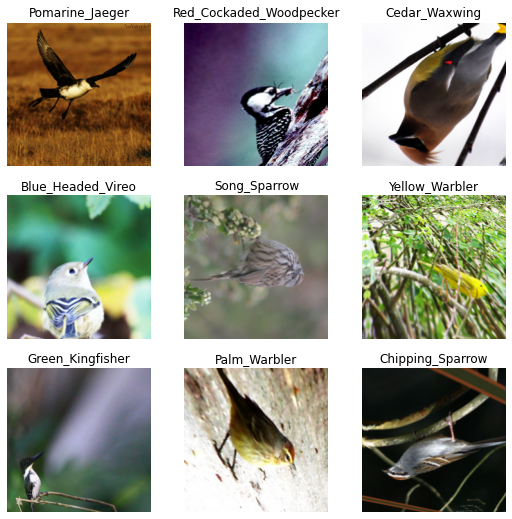

In [15]:
data.show_batch()

In [16]:
doc(show_batch)

## Entrenamiento

In [7]:
doc(cnn_learner)

In [17]:
learner1 = cnn_learner(data, resnet34, metrics=accuracy, opt_func=ranger)
learner2 = cnn_learner(data, resnet18, metrics=accuracy, opt_func=ranger, config=cnn_config(ps=0.25))

### Trabajando con el learner 1: primeras capas

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.04786301031708717)

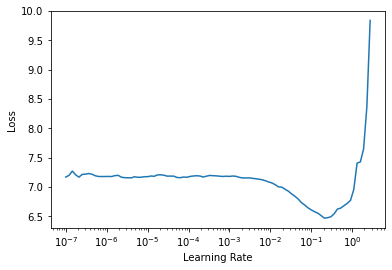

In [18]:
learner1.lr_find()

In [19]:
!cd birds

/bin/bash: line 0: cd: birds: No such file or directory


In [21]:
learner1.fit_one_cycle(5, lr_max=2.0892e-2) #con lo que me recomienda

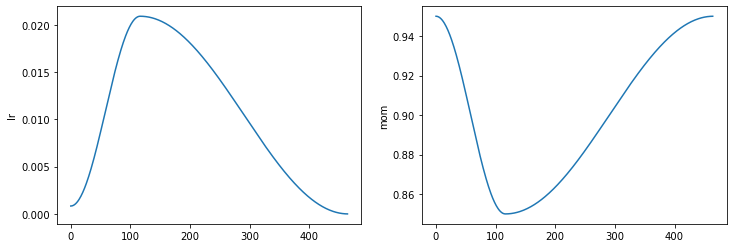

In [22]:
learner1.recorder.plot_sched()

In [23]:
learner1.save('stage1')

Path('models/stage1.pth')

In [33]:
learner1.load('stage1');

SuggestedLRs(lr_min=9.999999747378752e-07, lr_steep=1.0964781722577754e-06)

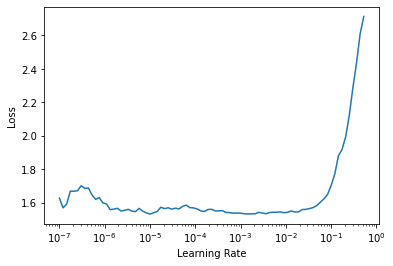

In [35]:
learner1.lr_find()

In [36]:
learner1.fit_one_cycle(5, lr_max=9.999999747378752e-07)

In [37]:
learner1.save('stage2')

Path('models/stage2.pth')

In [38]:
learner1.load('stage2');

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=4.786300905834651e-06)

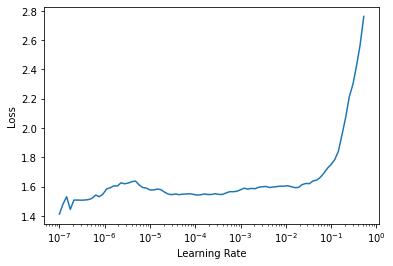

In [39]:
learner1.lr_find()

In [40]:
learner1.fit_one_cycle(5, lr_max=7.585775847473997e-08)

In [41]:
learner1.save('stage3')

Path('models/stage3.pth')

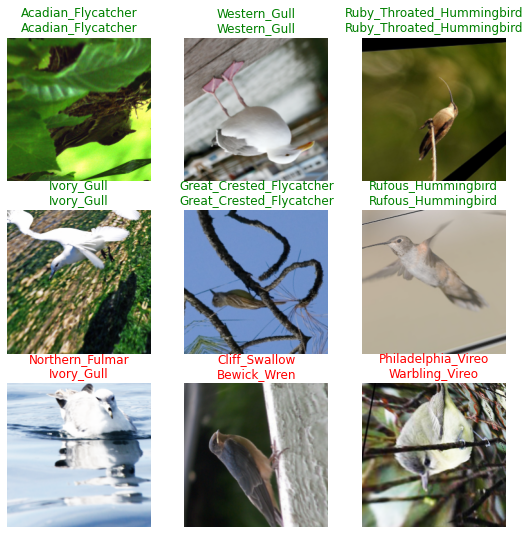

In [44]:
learner1.show_results(ds_idx=5,dl=data.train,shuffle=True) #okey, tal vez me la volé con las transformaciones...

### Todas las capas: learner 1

In [45]:
learner1.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.0199516913853586e-05)

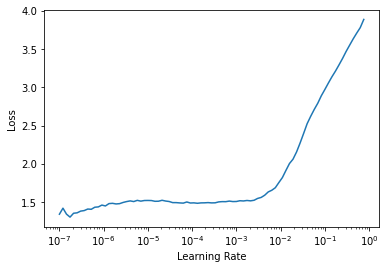

In [46]:
learner1.lr_find() #Esto esta horrible... voy a intentar regresar a una cosa approachable 

In [50]:
learner1.fit_one_cycle(2, max_lr=slice(10e-7,11e-4))

SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=1.0964781722577754e-06)

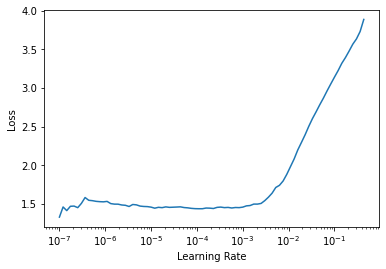

In [51]:
learner1.lr_find()

### ¿Tendrá esperanzas mis segundo learner? 

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.02754228748381138)

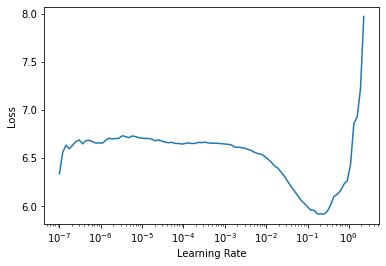

In [52]:
learner2.lr_find() #Para empezar esto se ve mil por ciento más trabajable que lo de arriba

In [54]:
#Yo calculo como 1e-2, pero la cosa me dice que 2.51e-2
learner2.save('stage0')

Path('models/stage0.pth')

In [60]:
learner2.fit_one_cycle(3, lr_max=2.51e-2)

In [62]:
learner2.load('stage0');

In [57]:
learner2.fit_one_cycle(3, lr_max=1e-2)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.04786301031708717)

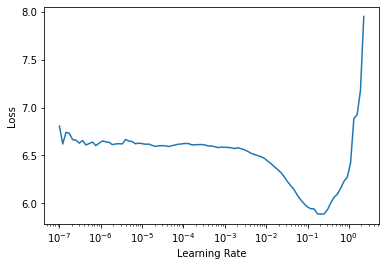

In [63]:
learner2.lr_find()

In [66]:
learner2.fit_one_cycle(7, lr_max=2e-2)

In [67]:
learner2.save('stage1')

Path('models/stage1.pth')

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=0.0004786300996784121)

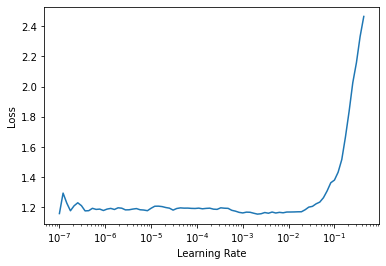

In [68]:
learner2.lr_find()

In [70]:
learner2.fit_one_cycle(7, lr_max=0.00020892962347716094)

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=1.0964781722577754e-06)

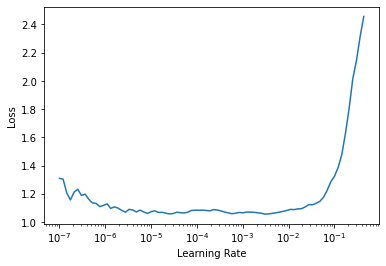

In [71]:
learner2.lr_find()

In [72]:
learner2.fit_one_cycle(7, lr_max=0.0003019951749593019)

In [73]:
learner2.load('stage0');

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.0691830962896347)

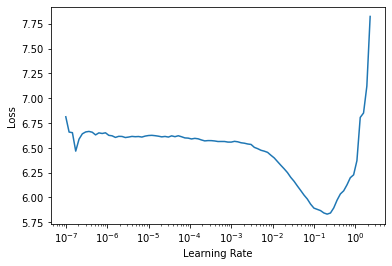

In [74]:
learner2.lr_find() #Me rendi: entrenare sobre esto y luego unfreeze... que tan malo puede ser?

In [75]:
learner2.fit_one_cycle(11, lr_max=0.02089296132326126)

In [76]:
learner2.save('stage3')

Path('models/stage3.pth')

In [77]:
learner2.unfreeze()

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=1.9054607491852948e-06)

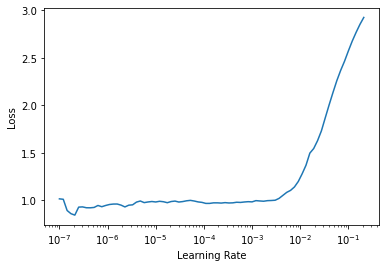

In [78]:
learner2.lr_find()

In [79]:
learner2.fit_one_cycle(6, lr_max=2.2908675418875645e-07)

# Creo que me la volé con las transformaciones:

In [4]:
doc(aug_transforms)

In [5]:
def load_data(folder, img_size, batch_size):
    tfms = aug_transforms(mult=2, flip_vert=True, #agregando mult, para max_warp y max_lighting
                          max_rotate=360, max_lighting=0.4,
                          p_affine=0.81, p_lighting=0.70, #para ajustar brillo y contraste de max_lighting... la baje un poco
                          max_zoom=1.2,max_warp=0.2, 
                          
                         ) #fue en el warp donde creo que tal vez no hice lo mejor
    data = DataBlock(
                        blocks    = (ImageBlock, CategoryBlock),
                        get_items = get_image_files,
                        get_y     = parent_label,
                        splitter  = GrandparentSplitter(),
                        item_tfms = Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [6]:
data = load_data(birds, img_size=224, batch_size=64)

Los siguientes los hice con:

```python
def load_data(folder,img_size,batch_size):
    tfms = aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.2, max_zoom=1.2, max_warp=2)
    data = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        splitter = GrandparentSplitter(),
        item_ftms = Resize(img_size),
        batch_tfms= tfms,
    )
    return data.dataloaders(folder,bs=batch_size
                            
````
Porque siento que el lr_find tan plano se debió a que no usé parámetros para cargar adecuadamente mis datos...

In [93]:
learner3 = cnn_learner(data, resnet18, metrics=accuracy, opt_func=ranger)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.033113110810518265)

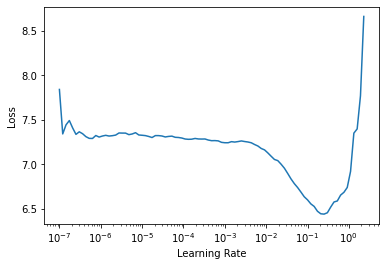

In [94]:
learner3.lr_find()

In [97]:
learner3.fit_one_cycle(11, lr_max=5e-2)

SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=9.12010818865383e-07)

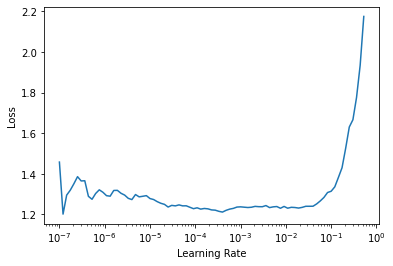

In [98]:
learner3.lr_find()

In [99]:
#learner3.fit_one_cycle(6, lr_max=1e-7)
learner3.fit_one_cycle(4, lr_max=3.98e-2,div=0.8,pct_start=0.75)

SuggestedLRs(lr_min=5.754399353463669e-07, lr_steep=2.2908675418875646e-06)

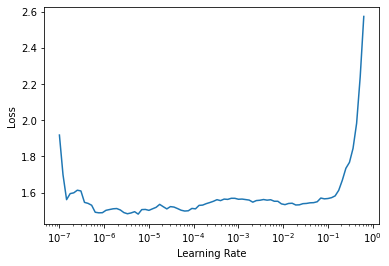

In [100]:
learner3.lr_find() #Debí de guardarla ja...

In [102]:
learner3.save("stagek")

Path('models/stagek.pth')

In [103]:
learner3.fit_one_cycle(4, lr_max=5.754e-7,div=0.8,pct_start=0.75)

In [104]:
learner3.save("stagek1")

Path('models/stagek1.pth')

In [105]:
learner3.unfreeze()

SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=1.3182567499825382e-06)

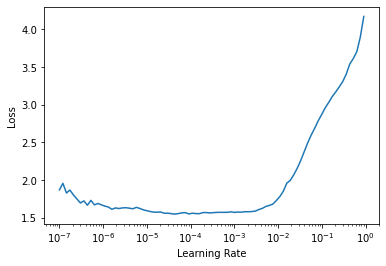

In [106]:
learner3.lr_find()  

In [107]:
learner3.fit_one_cycle(11, max_lr=slice(1e-7,5.5e-7))

In [108]:
learner3.save("stagek2")

Path('models/stagek2.pth')

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=6.309573450380412e-07)

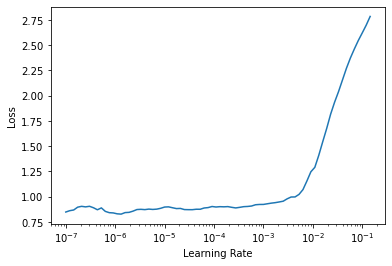

In [109]:
learner3.lr_find()  

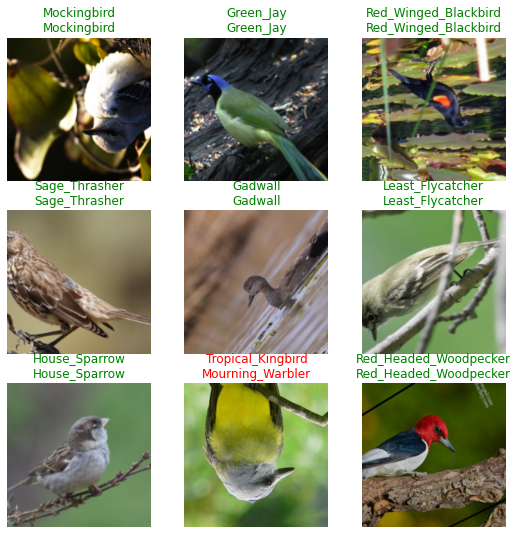

In [111]:
learner3.show_results(ds_idx=3,dl=data.train,shuffle=True)

### Interpretando resultados

In [112]:
interp1 = ClassificationInterpretation.from_learner(learner1)

In [113]:
interp2 = ClassificationInterpretation.from_learner(learner2)

In [114]:
interp3 = ClassificationInterpretation.from_learner(learner3)

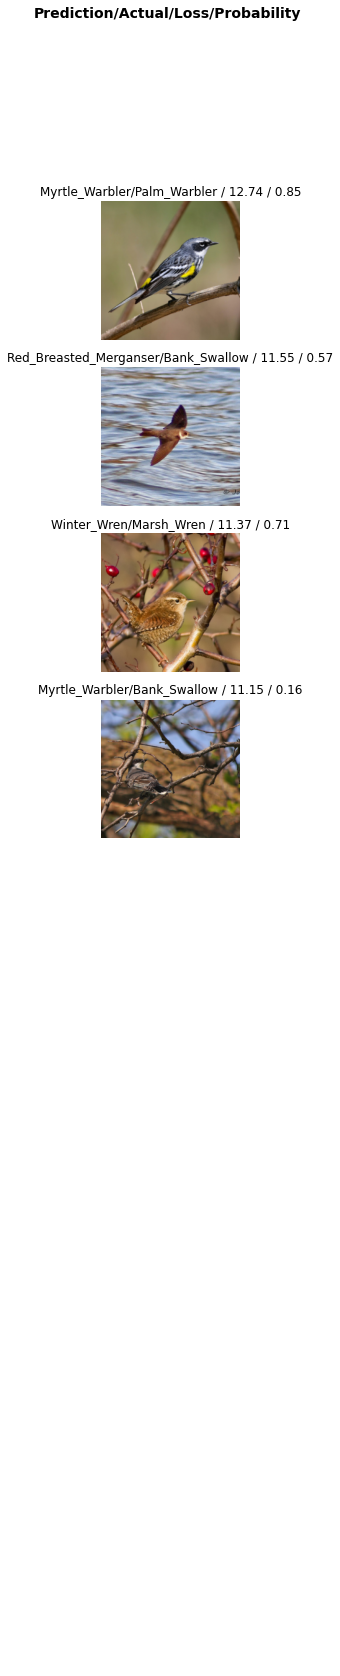

In [129]:
interp1.plot_top_losses(4, nrows=9)

In [122]:
doc(plot_top_losses)

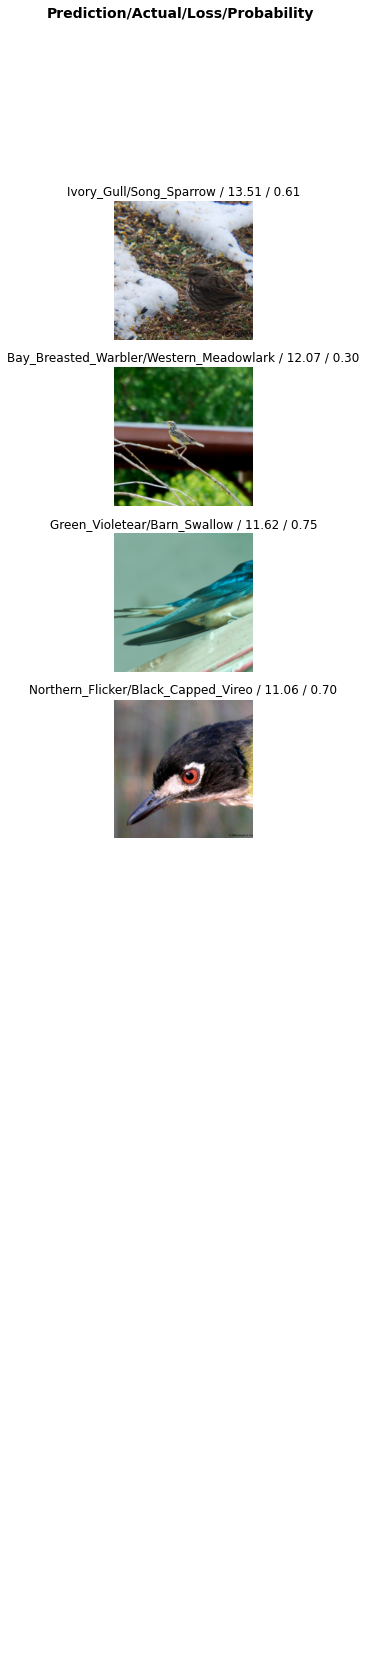

In [130]:
interp2.plot_top_losses(4, nrows=9)

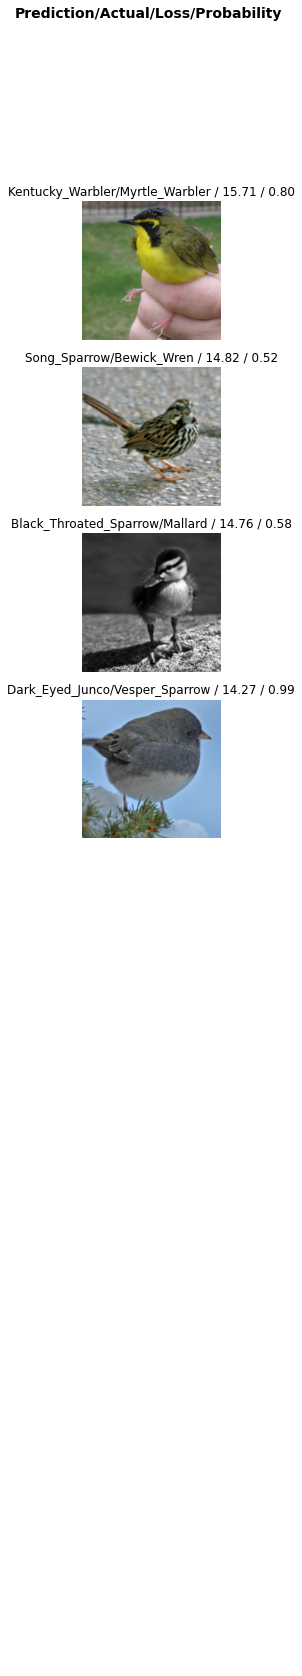

In [131]:
interp3.plot_top_losses(4, nrows=9)

Los siguientes los hice con:

```Python 
def load_data(folder, img_size, batch_size):
    tfms = aug_transforms(mult=2, flip_vert=True, #agregando mult, para max_warp y max_lighting
                          max_rotate=360, max_lighting=0.4,
                          p_affine=0.81, p_lighting=0.70, #para ajustar brillo y contraste de max_lighting... la baje un poco
                          max_zoom=1.2,max_warp=0.2, 
                          
                         ) #fue en el warp donde creo que tal vez no hice lo mejor
    data = DataBlock(
                        blocks    = (ImageBlock, CategoryBlock),
                        get_items = get_image_files,
                        get_y     = parent_label,
                        splitter  = GrandparentSplitter(),
                        item_tfms = Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)
````
A ver si puedo mejorar los valores de lr_find() porque no paso del 60.x% de accuracy

In [ ]:
interp2.plot_confusion_matrix(figsize=(16,16), dpi=300)

In [ ]:
interp3.plot_confusion_matrix(figsize=(16,16), dpi=300)

In [8]:
#Vi en la documentacion que usan CrossEntropyLossFlat(), vamos a ver qué tal ayuda aquí
learner_1 = cnn_learner(data, resnet34, loss_function=CrossEntropyLossFlat(), metrics=accuracy, opt_func=ranger) 

#Intento con cnn_config... vi que aquí es donde puedo elegir si es pre-entrenada (obvio no la voy a mover)
#Y también vi que ps = 0.5, lo voy a cambiar un poco, antes lo moví a 0.25... pero no me ayudó mucho
learner_2 = cnn_learner(data, resnet34, metrics=accuracy, config=cnn_config(ps=0.45)) 

Vamos con el primero:

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.03981071710586548)

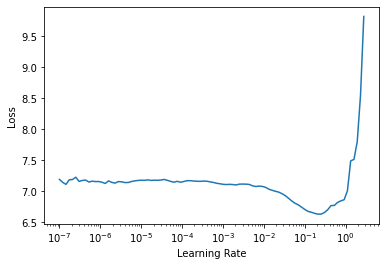

In [9]:
learner_1.lr_find() #Esto no se ve taaan bien, la verdad :(

In [10]:
learner_1.save("Exp1_0") #voy a guardarlo en caso de que vuelva a volarse la vida luego luego 

Path('models/Exp1_0.pth')

In [11]:
learner_1.fit_one_cycle(3, lr_max=5e-2) #esto de acuerdo a lo que veo... ahorita lo itentaré con la que me sugieren

SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=9.12010818865383e-07)

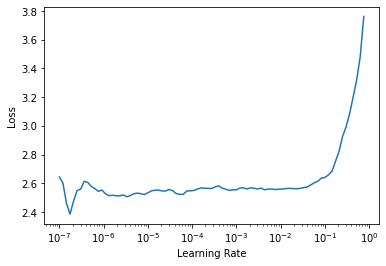

In [12]:
learner_1.lr_find() #hay un pico... y otra vez está plana la vida... voy a guardarla para tomar lo que se vea mejor, aunque dudo mucho que sirva

In [13]:
learner_1.save("Exp1_1mio")

Path('models/Exp1_1mio.pth')

In [15]:
learner_1.load("Exp1_0");

In [16]:
learner_1.fit_one_cycle(3, lr_max=0.02089296132326126) #con los valores que me sugieren

SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=1.9054607491852948e-06)

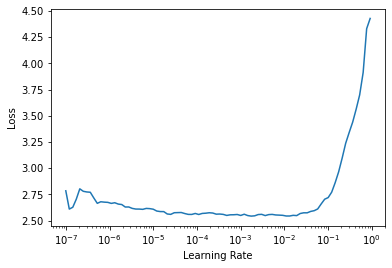

In [17]:
learner_1.lr_find() 

In [18]:
learner_1.save("Exp1_1suyo1")

Path('models/Exp1_1suyo1.pth')

In [19]:
learner_1.load("Exp1_0");

In [20]:
learner_1.fit_one_cycle(3, lr_max=0.03981071710586548) #con los valores que me sugieren... lr_steep?

Creo que nos quedamos con el primer valor que nos ofertan

In [24]:
learner_1.load("Exp1_0")

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0831763744354248)

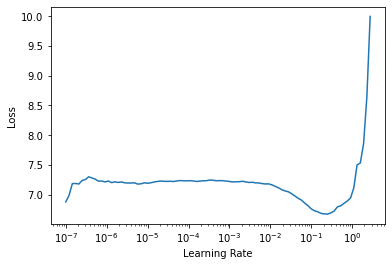

In [25]:
learner_1.lr_find()

In [26]:
learner_1.fit_one_cycle(5, lr_max= 7e-2) #bueno... ultimo experiemnto porque se ve que por ahí hay una pendiente buena

Nota_ de la 2 a la 3 hubo un salto más importante que en otros... no está taaan mal, alcanzo el 54 con 5 epochs...

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=1.9054607491852948e-06)

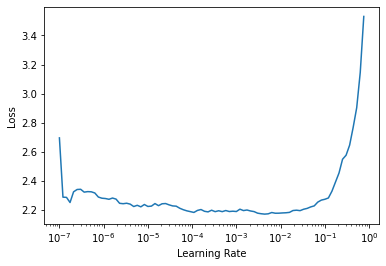

In [27]:
learner_1.lr_find()

In [28]:
learner_1.fit_one_cycle(10, lr_max= 0.00043651582673192023)

Ya se quedó estancada la accuracy... perhaps la líneal plana del lr_find()?

In [29]:
learner_1.load("Exp1_0") #volví al incio 

In [30]:
learner_1.fit_one_cycle(5, lr_max= 0.0251188) #no le hice caso al cien 

In [31]:
learner_1.save("Exp1_1") #al menos voy en 59... 

Path('models/Exp1_1.pth')

SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=4.786300905834651e-06)

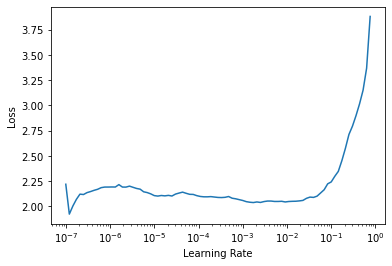

In [33]:
learner_1.lr_find()

In [34]:
learner_1.fit_one_cycle(5,lr_min=1.737e-4)

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=1.2022644114040304e-05)

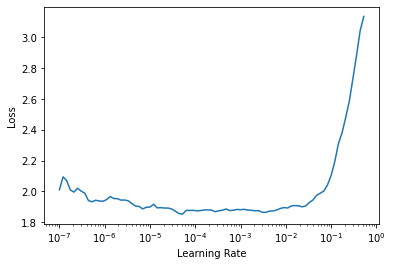

In [35]:
learner_1.lr_find()

In [36]:
learner_1.fit_one_cycle(5,lr_min=5.248e-6)

A ver: creo que se van a a-ranar mis puntajes en algún punto: proseguiré descongelando esta red. El otr learner lo voy a seguir empujando otras tres veces y luego descongelo, veré qué logro así

In [37]:
learner_1.save("Exp1_antes")

Path('models/Exp1_antes.pth')

In [38]:
learner_1.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.737800812406931e-05)

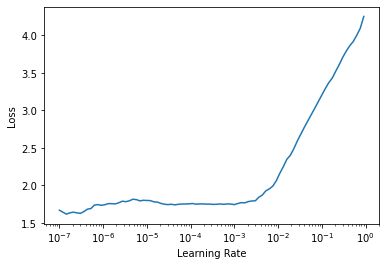

In [39]:
learner_1.lr_find()

In [40]:
learner_1.fit_one_cycle(5,lr_min=9.12011e-08)

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=0.00015848931798245758)

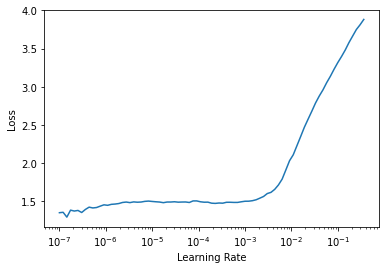

In [41]:
learner_1.lr_find()

In [42]:
learner_1.fit_one_cycle(5,lr_min=6.30957e-8)

In [43]:
learner_1.save("stage_after")

Path('models/stage_after.pth')

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

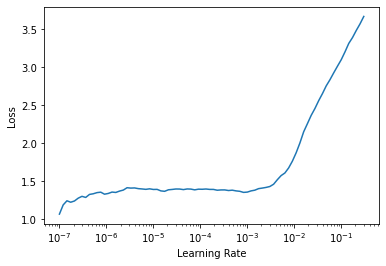

In [44]:
learner_1.lr_find()

In [46]:
learner_1.fit_one_cycle(5, max_lr=slice(9.1201e-8,7.585775e-4))

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=1.3182567499825382e-06)

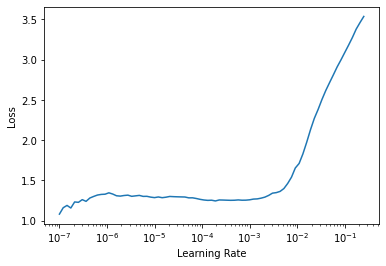

In [47]:
learner_1.lr_find()

In [48]:
learner_1.fit_one_cycle(6, max_lr=slice(1.3182567e-6,1.90546e-5))

In [49]:
learner_1.save("stage_after1")

Path('models/stage_after1.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.999999747378752e-06)

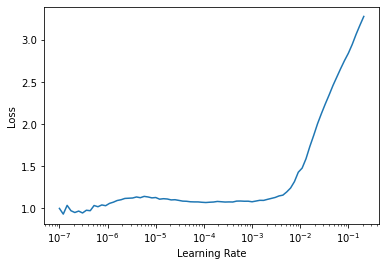

In [50]:
learner_1.lr_find()

In [52]:
learner_1.fit_one_cycle(6, max_lr=slice(6.309573e-8,5e-6))

In [53]:
learner_1. save("stage_after2")

Path('models/stage_after2.pth')

SuggestedLRs(lr_min=1.584893179824576e-05, lr_steep=3.981071586167673e-06)

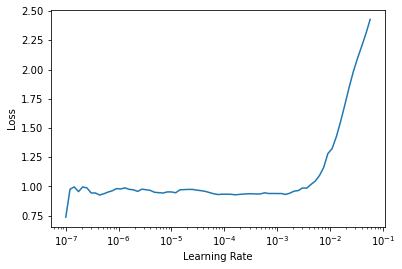

In [55]:
learner_1.lr_find()

In [56]:
learner_1.fit_one_cycle(6, max_lr=slice(4e-7,6.5e-6)) #aquí tomé un piquitititio

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=1.5848931980144698e-06)

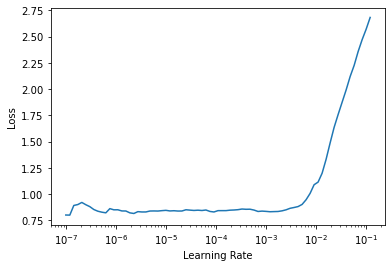

In [57]:
learner_1.lr_find()

In [58]:
learner_1.fit_one_cycle(6, max_lr=slice(4e-7,7e-7))

In [59]:
learner_1.save("stage_after3")

Path('models/stage_after3.pth')

Eventualmente, haciendo muuuuchos entrenamientos puedo alcanzar una buena accuracy... veamos si mejora ya con el otro learner y luego puedo hacer comparación de ambos. 

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.010964781977236271)

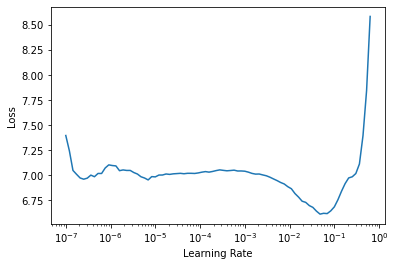

In [60]:
learner_2.lr_find() #de entrada esto se ve miiiil veces mejor y con más esperanza

In [61]:
learner_2.save("Exp2_0")

Path('models/Exp2_0.pth')

In [63]:
learner_2.fit_one_cycle(4, lr_max=0.0047863) #con lo que me ofertan

In [64]:
learner_2.save("Exp2_suyos1")

Path('models/Exp2_suyos1.pth')

In [65]:
learner_2.load("Exp2_0");

In [66]:
learner_2.fit_one_cycle(4, lr_max=3e-2) 

A ratos, noto que mis observaciones tiene incrementos de accuracy más grandes que lo que me ofrecen, aunque con 4 epochs no logro llegar a lo que llego, taaaaal vez podría alcanzar a Exp2_suyos eventualmente. No me creo arriesgar, pero veamos su loss

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.630780702224001e-05)

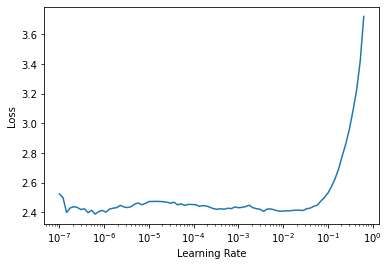

In [68]:
learner_2.lr_find()

In [69]:
learner_2.save("Exp2_mios1")

Path('models/Exp2_mios1.pth')

In [70]:
learner_2.load("Exp2_suyos1")

SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=5.754399353463668e-06)

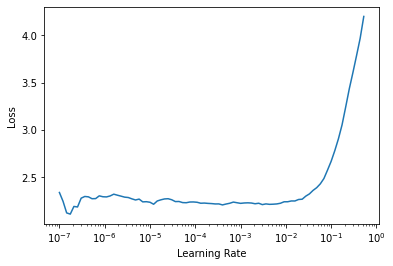

In [71]:
learner_2.lr_find()

In [72]:
learner_2.fit_one_cycle(6, lr_max=1e-5) #suuuper lento

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

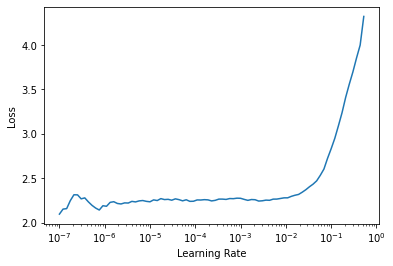

In [73]:
learner_2.lr_find()

In [74]:
learner_2.fit_one_cycle(6, max_lr=slice(7.5857758e-8,6.31e-7)) #intentando con slice

SuggestedLRs(lr_min=6.30957365501672e-06, lr_steep=5.754399353463668e-06)

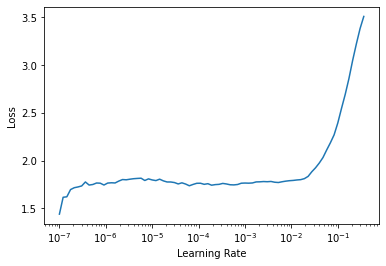

In [75]:
learner_2.lr_find()

In [76]:
learner_2.fit_one_cycle(6, max_lr=slice(5.754399354e-6,6.31e-6)) 

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.981071586167673e-06)

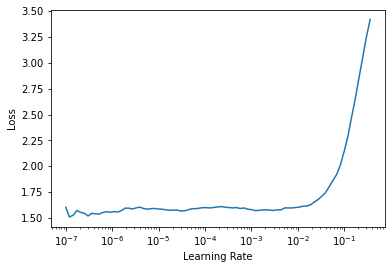

In [77]:
learner_2.lr_find()

In [78]:
learner_2.fit_one_cycle(11, max_lr=slice(3.981e-6,6.31e-08)) #Lo admito: me desesperé

SuggestedLRs(lr_min=9.999999747378752e-07, lr_steep=4.786300905834651e-06)

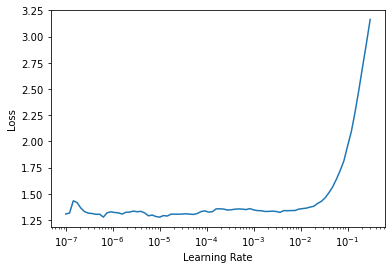

In [79]:
learner_2.lr_find()

In [80]:
learner_2.fit_one_cycle(11, max_lr=slice(9.9999e-07,4.7863e-06))

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=1.3182567499825382e-06)

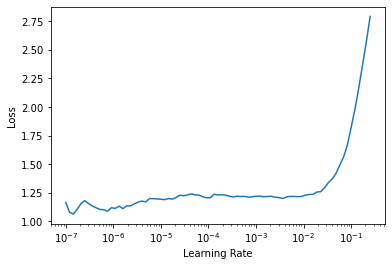

In [81]:
learner_2.lr_find()

In [82]:
learner_2.fit_one_cycle(5, max_lr=slice(7.5857758e-08,1e-07))

In [83]:
learner_2.save("Exp2_suyos2")

Path('models/Exp2_suyos2.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.311311274956097e-06)

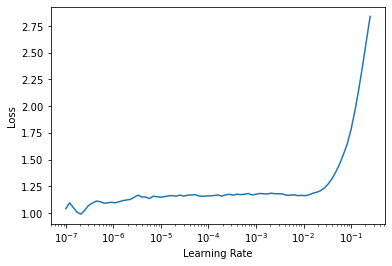

In [84]:
learner_2.lr_find()

In [85]:
learner_2.fit_one_cycle(5, max_lr=slice(6.31e-08,2e-07))

Idea: llegar a 70% al menos y descongelar... tal vez así logre un 80% :(

SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=7.585775847473997e-07)

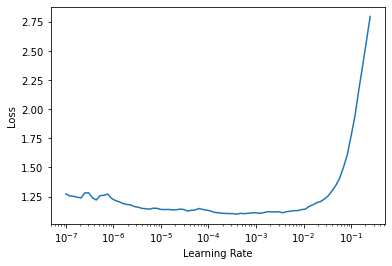

In [86]:
learner_2.lr_find()

In [87]:
learner_2.fit_one_cycle(5, max_lr=slice(7.5857758e-08,3.98107164e-05))

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=4.786300905834651e-06)

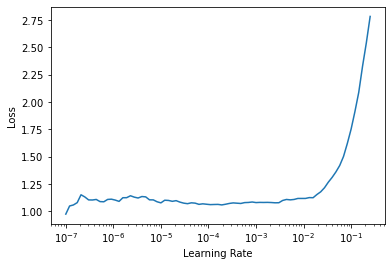

In [88]:
learner_2.lr_find()

In [89]:
learner_2.fit_one_cycle(6, max_lr=slice(4.7863e-6,1.9e-05))

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=2.2908675418875646e-06)

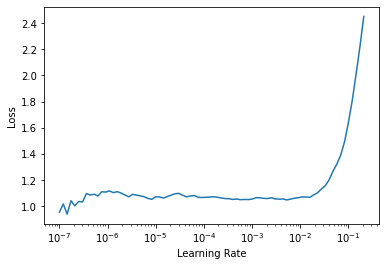

In [91]:
learner_2.lr_find()

In [92]:
learner_2.save("Exp2_suyos3")

Path('models/Exp2_suyos3.pth')

Me está costando mucho trabajo llegar al 70%, voy a descongelar ya

In [93]:
learner_2.unfreeze()

SuggestedLRs(lr_min=2.511886486900039e-06, lr_steep=6.918309736647643e-06)

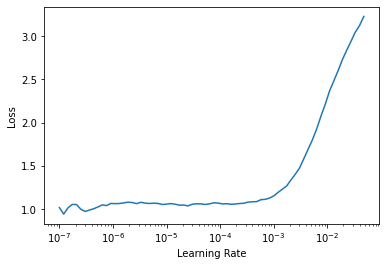

In [94]:
learner_2.lr_find()

In [95]:
learner_2.fit_one_cycle(5, max_lr=2.5118864e-06) #creo que ya la maté ja... 

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.5848931980144698e-06)

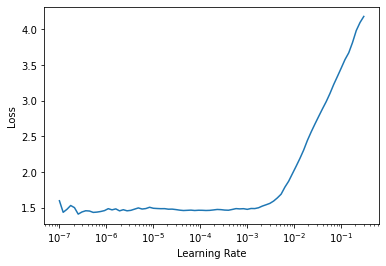

In [96]:
learner_2.lr_find()

In [97]:
learner_2.fit_one_cycle(5, max_lr=slice(6.31e-08,1.584893e-06))

SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=6.309573450380412e-07)

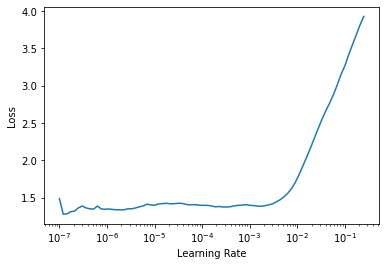

In [98]:
learner_2.lr_find()

In [99]:
#En un arranque de desesperación:

In [100]:
learner_2.fit_one_cycle(20, max_lr=slice(1.9e-07,6.31e-07))

In [101]:
#Al fin subí al 70... qué estrés
learner_2.save("Exp2_despues1")

Path('models/Exp2_despues1.pth')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.0964781722577754e-06)

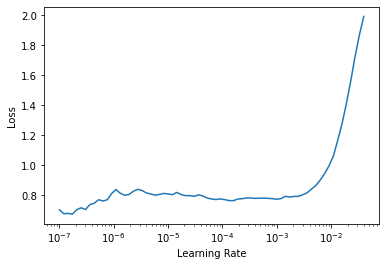

In [104]:
learner_2.lr_find()

In [105]:
learner_2.fit_one_cycle(5, max_lr=slice(6.31e-08,1e-07))

Después de pensarlo horas y horas... ¿Será que mis datos de train y test están bien divididos? ¿Confié ciegamente a lo menso en el README? 

In [106]:
train_f=get_image_files("images/train/")
valid_f=get_image_files("images/valid/")

In [108]:
len(train_f)

5994

In [109]:
len(valid_f)

5794

**Clarooo!!!** Está súuuuuper mal partido mi set de train y validación!!! 

Estoy utilizando la mitad de los datos solamente para entrentar y confiar en que puedo hacer un buen entrenamiento. Debí hacer 70% para entrenar y dejar el otro 30% 

Y a eso le voy agregar en que taaaal vez no esté perfectamente etiquetado mi set de datos. Me sorprende haber alcanzado el 70% de accuracy con esa loss a ratos, francamente.

**Moraleja:** revisar más los documentos de "ayuda" y no confiar ciegamente en la vida. 